In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## **PROBLEM STATEMENT**

**DOMAIN**: Industrial safety. NLP based Chatbot.

**CONTEXT:**
The  database  comes  from one  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

**DATA DESCRIPTION:**
This  The  database  is  basically  records  of  accidents  from12  different  plants  in  03  different  countrieswhich  every  line  in  the  data  is  an occurrence of an accident.

**Columns description:**
- `Data`: timestamp or time/date information
- `Countries`: which country the accident occurred (anonymised)
- `Local`: the city where the manufacturing plant is located (anonymised)
- `Industry sector`: which sector the plant belongs to
- `Accident level`: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- `Potential Accident Level`: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
- `Genre`: if the person is male of female
- `Employee or Third Party`: if the injured person is an employee or a third party
- `Critical Risk`: some description of the risk involved in the accident
- `Description`: Detailed description of how the accident happened.

**PROJECT OBJECTIVE:**
Design  a  ML/DL  based  chatbot  utility  which  can  help  the  professionals  to  highlight  the  safety  risk  as  per  the  incident description.

In [2]:
pip install  pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 49.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
pd.set_option('max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

nltk.download('stopwords')    # loading the stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
# to remove common stop words
from nltk.corpus import stopwords
from spellchecker import SpellChecker
# to visualize text data using wordcloud
# from wordcloud import STOPWORDS

# to perform stemming
from nltk.stem.porter import PorterStemmer
#to perform lemmentization
from nltk.stem import WordNetLemmatizer

# to perform tokenization
from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the SpaCy library
# To create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# To create TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# To import Word2Vec
from gensim.models import Word2Vec

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style("whitegrid")

# to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### **Import the dataset and overview**

In [4]:
# Read the xlsx dataset and create a copy of it
dataset = pd.read_excel('/content/drive/MyDrive/Data/DataSet_industrial_safety_and_health_database_with_accidents_description.xlsx')
#dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone/NLPChatbot/DataSet_industrial_safety_and_health_database_with_accidents_description.xlsx')
df = dataset.copy()

In [5]:
# Display the first 5 rows of the dataset
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


In [6]:
# Display the last 5 rows of the dataset
df.tail()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
420,434,2017-07-04,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, when lifting the Kelly HQ towards the pulley of the frame to align it, the assistant Marco that is in the later one is struck the hand against the frame generating the injury."
421,435,2017-07-04,Country_01,Local_03,Mining,I,II,Female,Employee,Others,"The collaborator moved from the infrastructure office (Julio to the toilets, when the pin of the right shoe is hooked on the bra of the left shoe causing not to take the step and fall untimely, causing injury described."
422,436,2017-07-05,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,"During the environmental monitoring activity in the area, the employee was surprised by a swarming swarm of weevils. During the exit of the place, endured suffering two stings, being one in the face and the other in the middle finger of the left hand."
423,437,2017-07-06,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,"The Employee performed the activity of stripping cathodes, when pulling the cathode sheet his hand hit the side of another cathode, causing a blunt cut on his 2nd finger of the left hand."
424,438,2017-07-09,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the floor of module ""E"" in the central camp, she slipped back and immediately grabbed the laundry table to avoid falling to the floor; suffering the described injury."


In [7]:
# Print the shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 425 rows and 11 columns


### **Data cleaning and analysis**

**Observations from visual analysis of the excel dataset:**
- Column `Unnamed: 0` looks like the row index, and seem to serve no purpose. We shall drop this column.
- Column `Data` is actually the `Date` column and should be renamed so.
- Column `Genre` should be renamed as `Gender` for better understanding. It only has values - `Male` and `Female`.
- Column `Employee or Third Party` can be renamed as `Employee_Type` for better understanding.
- Column `Countries` represent a single country, and should be renamed as `Country` for better representation.
- Column `Local` represents the location, and should be renamed same for better representation.
- We also replace spaces from the column names with `_` for simplicity in programming.

In [9]:
# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Rename the columns
df.rename(columns={
    'Data':'Date',
    'Countries':'Country',
    'Local':'Location',
    'Industry Sector':'Industry_Sector',
    'Accident Level':'Accident_Level',
    'Potential Accident Level':'Potential_Accident_Level',
    'Genre':'Gender',
    'Employee or Third Party':'Employee_Type',
    'Critical Risk':'Critical_Risk'
}, inplace=True)

In [10]:
# Observe couple of rows to see the changes
df.head(3)

,Date,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."


#### Check for missing or null values or duplicate records

In [11]:
# Check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Country                   425 non-null    object        
 2   Location                  425 non-null    object        
 3   Industry_Sector           425 non-null    object        
 4   Accident_Level            425 non-null    object        
 5   Potential_Accident_Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee_Type             425 non-null    object        
 8   Critical_Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [12]:
# Check for missing values
df.isnull().sum()

,0
Date,0
Country,0
Location,0
Industry_Sector,0
Accident_Level,0
Potential_Accident_Level,0
Gender,0
Employee_Type,0
Critical_Risk,0
Description,0


**Observation:** None of the columns have null values.

In [13]:
# Check for duplicate values
df.duplicated().sum()

7

**Observation:** There are 7 duplicate records.

In [14]:
# Drop the duplicate values
df.drop_duplicates(inplace=True)
df=df.reset_index(drop=True)
df.shape

(418, 10)

In [15]:
# Check for duplicate values
df.duplicated().sum()

0

In [16]:
#checking to see  if there are repeated description in our data

df['Description'].duplicated().sum()

7

**Observations** : There are 7 rows that have duplicate descriptions

In [17]:
df[df['Description'].duplicated(keep=False)]

,Date,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
37,2016-02-24,Country_02,Local_07,Mining,I,V,Male,Employee,Others,When starting the activity of removing a coil of electric cables in the warehouse with the help of forklift truck the operator did not notice that there was a beehive in it. Due to the movement of the coil the bees were excited. Realizing the fact the operator turned off the equipment and left the area. People passing by were stung.
38,2016-02-24,Country_02,Local_07,Mining,I,V,Female,Third Party,Others,When starting the activity of removing a coil of electric cables in the warehouse with the help of forklift truck the operator did not notice that there was a beehive in it. Due to the movement of the coil the bees were excited. Realizing the fact the operator turned off the equipment and left the area. People passing by were stung.
129,2016-05-26,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,"In the geological reconnaissance activity, in the farm of Mr. Lázaro, the team composed by Felipe and Divino de Morais, in normal activity encountered a ciliary forest, as they needed to enter the forest to verify a rock outcrop which was the front, the Divine realized the opening of the access with machete. At that moment, took a bite from his neck. There were no more attacks, no allergic reaction, and continued work normally. With the work completed, leaving the forest for the same access, the Divine assistant was attacked by a snake and suffered a sting in the forehead. At that moment they moved away from the area. It was verified that there was no type of allergic reaction and returned with normal activities."
130,2016-05-26,Country_03,Local_10,Others,I,I,Male,Employee,Others,"In the geological reconnaissance activity, in the farm of Mr. Lázaro, the team composed by Felipe and Divino de Morais, in normal activity encountered a ciliary forest, as they needed to enter the forest to verify a rock outcrop which was the front, the Divine realized the opening of the access with machete. At that moment, took a bite from his neck. There were no more attacks, no allergic reaction, and continued work normally. With the work completed, leaving the forest for the same access, the Divine assistant was attacked by a snake and suffered a sting in the forehead. At that moment they moved away from the area. It was verified that there was no type of allergic reaction and returned with normal activities."
142,2016-06-08,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,"Project of Vazante that carried out sediment collection of current in the South of Mata target, in the drainage of Serra do Garrote. team that was composed of 04 members of the WCA company, being the S.r.s Leandro, and Jehovânio. they were moving from one collection point to another, inside a shallow drainage, they saw the bee carton, the reaction was to move away from the box as quickly as possible to avoid the stings, they ran about 50 meters, looking for a safe area, to exit the radius of attack of the bees, but the S.S. and Breno), were attacked and consequently they suffered 02 stings, in the belly and Jehovah in the hand, verified that there was no type of allergic reaction, returned with the normal activities."
143,2016-06-08,Country_03,Local_10,Others,I,I,Male,Third Party,Others,"Project of Vazante that carried out sediment collection of current in the South of Mata target, in the drainage of Serra do Garrote. team that was composed of 04 members of the WCA company, being the S.r.s Leandro, and Jehovânio. they were moving from one collection point to another, inside a shallow drainage, they saw the bee carton, the reaction was to move away from the box as quickly as possible to avoid the stings, they ran about 50 meters, looking for a safe area, to exit the radius of attack of the bees, but the S.S. and Breno), were attacked and consequently they suffered 02 stings, in the belly and

* 7 accident descriptions are repeated in the data.
* These are accidents which happened at the same time where a group was invovled and there are different records for each person.  
* As this corresponds to differnt records, we will not remove the repeated descriptions and keep them as it is.

**We now have 418 records after 7 duplicate rows have been removed **

#### Date processing
Let us break the Date in Year, Month and Day which would help in further processing.

In [18]:
df_proc_1 = df.copy()

df_proc_1['Date'] = pd.to_datetime(df_proc_1['Date'])
df_proc_1['Year'] = df_proc_1['Date'].dt.year
df_proc_1['Month'] = df_proc_1['Date'].dt.month_name()
df_proc_1['Day'] = df_proc_1['Date'].dt.day
df_proc_1['Weekday'] = df_proc_1['Date'].dt.day_name()
df_proc_1.drop(columns=['Date'], inplace=True)

df_proc_1.head(3)

,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Year,Month,Day,Weekday
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",2016,January,1,Friday
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",2016,January,2,Saturday
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",2016,January,6,Wednesday


In [19]:
# Select all columns except 'Description'
df_temp = df_proc_1.loc[:, df_proc_1.columns != 'Description']

# Function to display unique values in each column except 'Date' and 'Description'
def unique_values(df_temp):
    for column in df_temp.columns:
        print(f'{column}: {df_temp[column].unique()}')
        print('-----------------------------------')

unique_values(df_temp)

Country: ['Country_01' 'Country_02' 'Country_03']
-----------------------------------
Location: ['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
-----------------------------------
Industry_Sector: ['Mining' 'Metals' 'Others']
-----------------------------------
Accident_Level: ['I' 'IV' 'III' 'II' 'V']
-----------------------------------
Potential_Accident_Level: ['IV' 'III' 'I' 'II' 'V' 'VI']
-----------------------------------
Gender: ['Male' 'Female']
-----------------------------------
Employee_Type: ['Third Party' 'Employee' 'Third Party (Remote)']
-----------------------------------
Critical_Risk: ['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fa

Looking at the above output, we may drop the Year and Day columns as they seem irrelevant for the analysis.

In [20]:
# Drop the Day and Year columns
df_proc_1.drop(columns=['Year', 'Day'], inplace=True)
df_proc_1.head(3)

,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Month,Weekday
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",January,Friday
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",January,Saturday
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",January,Wednesday


## **Exploratory Data Analysis**

### **Univariate analysis**

#### **Distribution of individual columns**

In [21]:
df_proc_1.columns

Index(['Country', 'Location', 'Industry_Sector', 'Accident_Level',
       'Potential_Accident_Level', 'Gender', 'Employee_Type', 'Critical_Risk',
       'Description', 'Month', 'Weekday'],
      dtype='object')

In [22]:
# Function to plot distribution of each column
def plot_countplot(df_temp, column):
    plt.figure(figsize=(20, 6))
    sns.countplot(data=df_temp, x=column, order=df_temp[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')

    # Annotate the frequency percentage of each label
    total = len(df_temp[column])
    for p in plt.gca().patches:
        height = p.get_height()
        percentage = f'{height / total:.2%}'
        plt.gca().annotate(f'{percentage}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

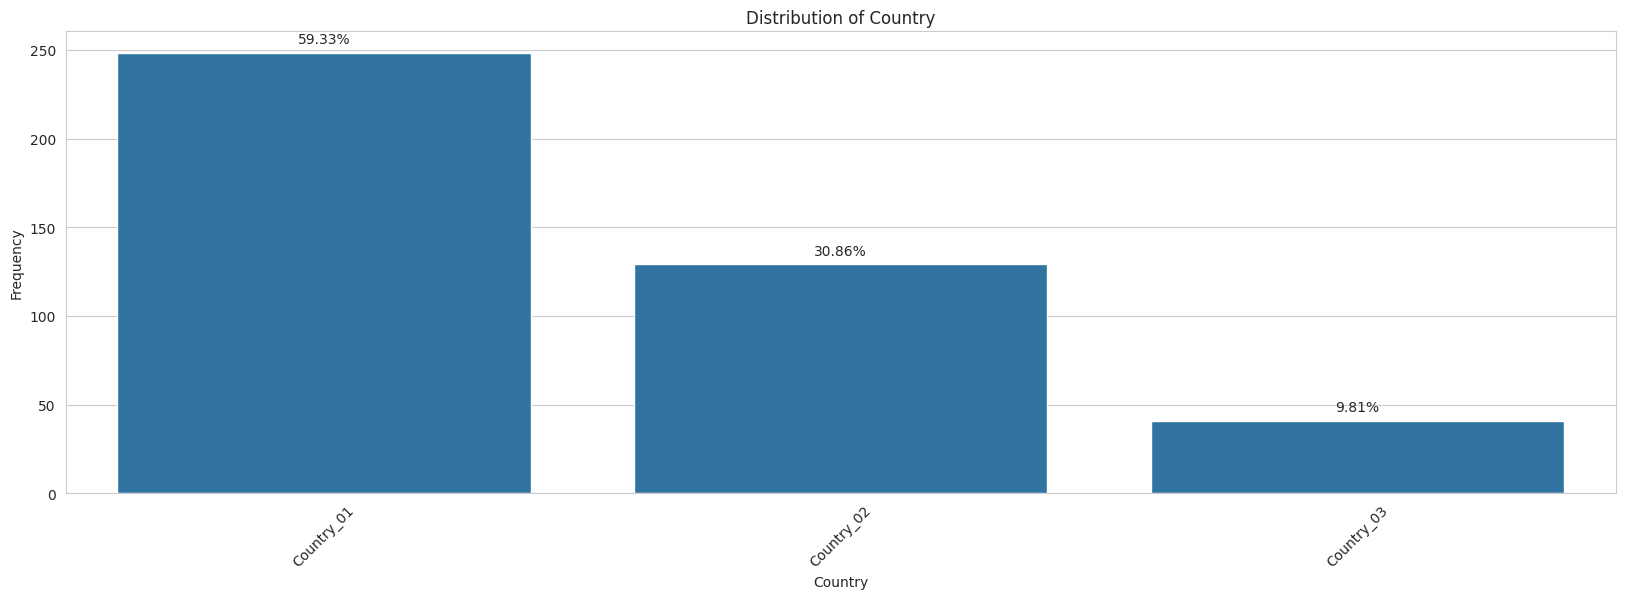

In [23]:
plot_countplot(df_proc_1, 'Country')

We have data for 3 countries, 60% of the data is for Country_01, 31% for countrty_02 and only 10% for country_03. It is possible country_01 is more prone to accidents, or there is data imbalace. Need to check if there is some relationships between country and accidents

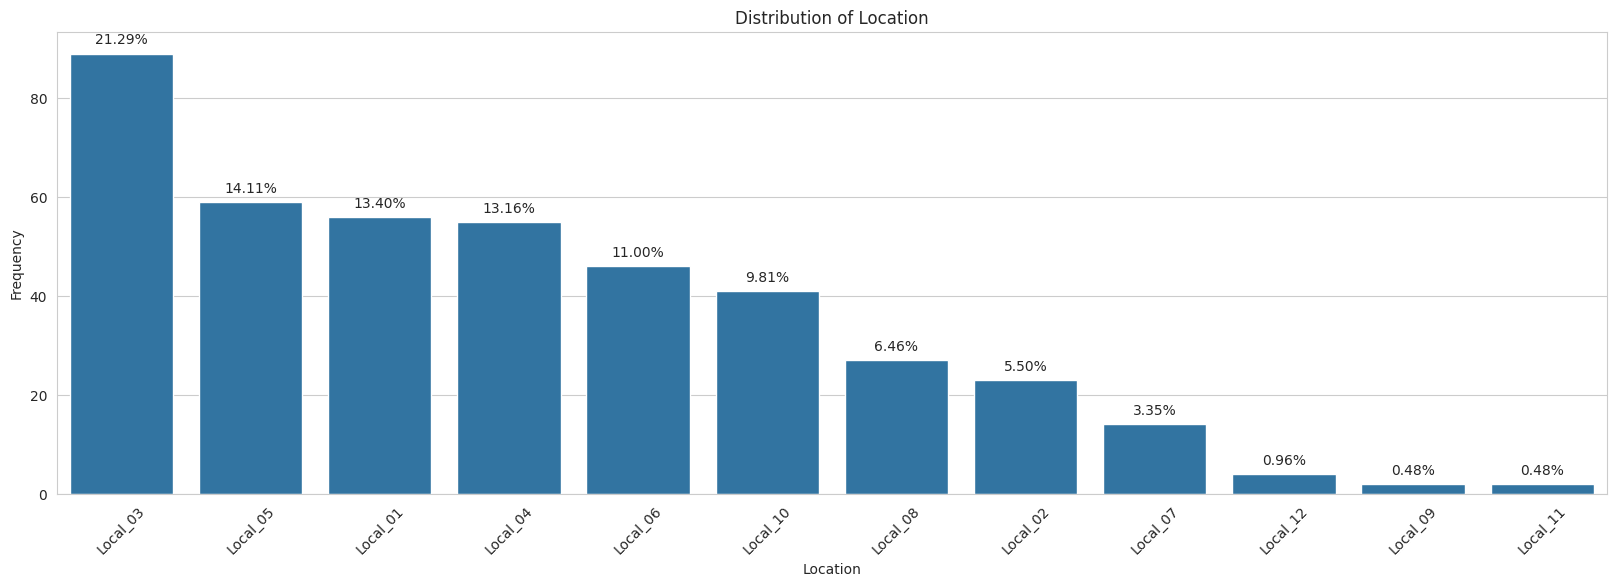

In [24]:
plot_countplot(df_proc_1, 'Location')

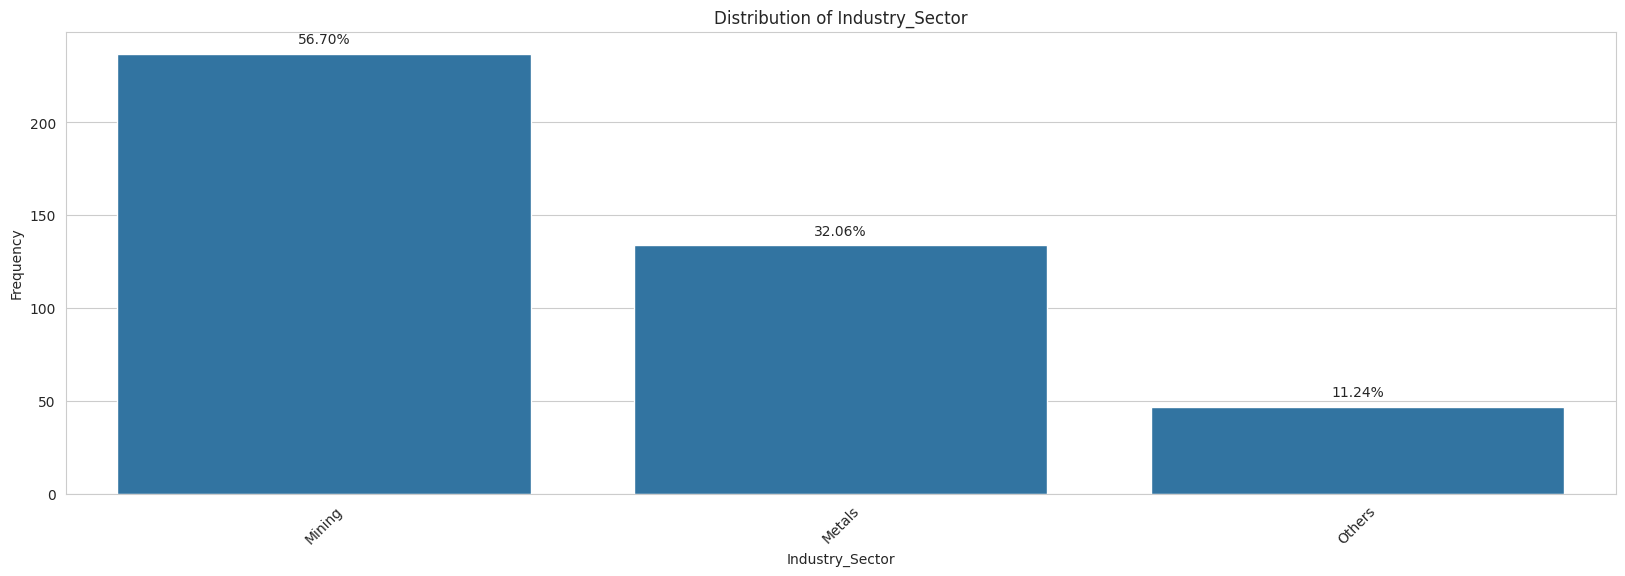

In [25]:
plot_countplot(df_proc_1, 'Industry_Sector')

Because of the nature of work Mining sector is more prone to accidents then Metals and others which is also being reflected in the data.

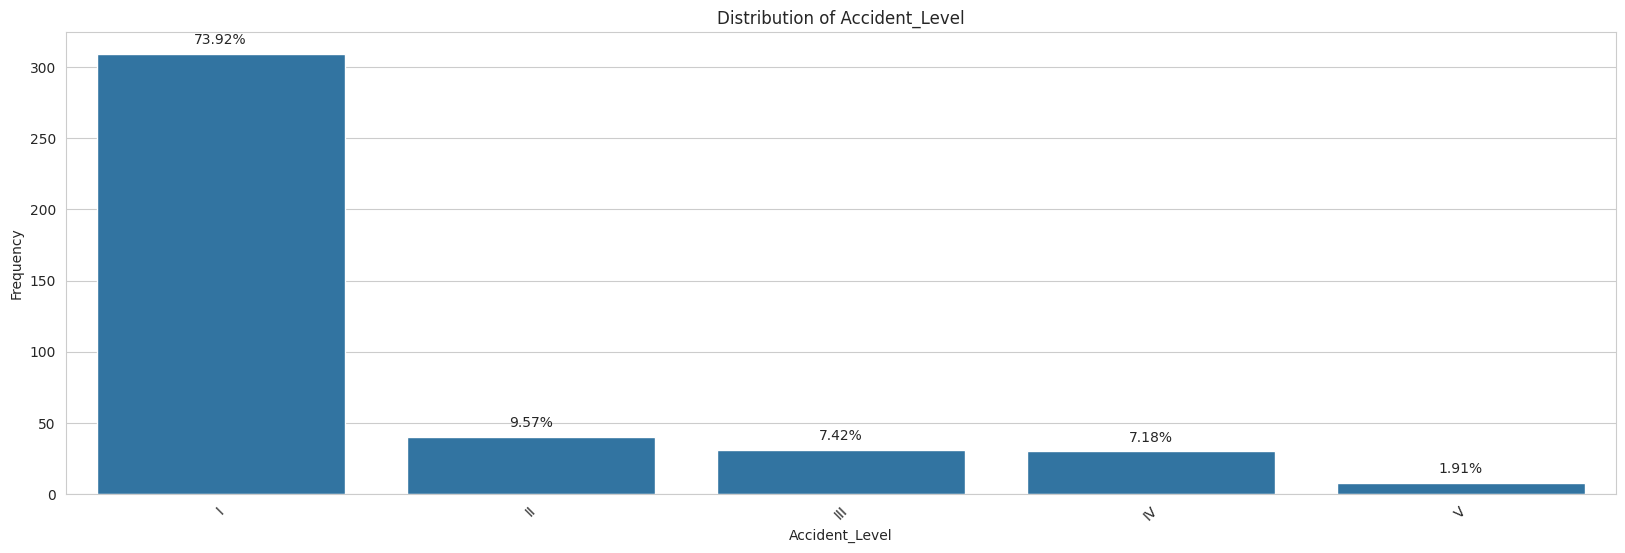

In [26]:
plot_countplot(df_proc_1, 'Accident_Level')

there are around 2% of accidents in severe category 5. Though there is no data for accidents in level 6 which is the highest category.

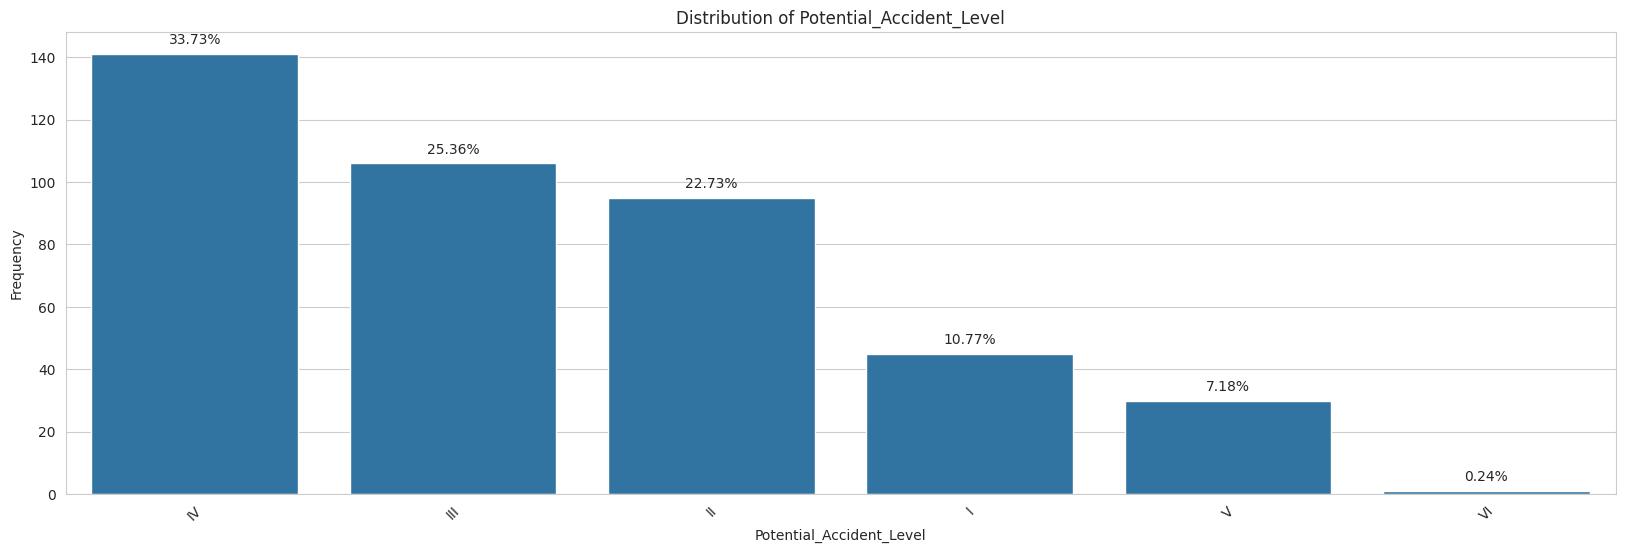

In [27]:
plot_countplot(df_proc_1, 'Potential_Accident_Level')

There are 34% scnearios where the accidents could be as sever as range 4, followed by 25.3% of level 3. Also 0.25% chances of

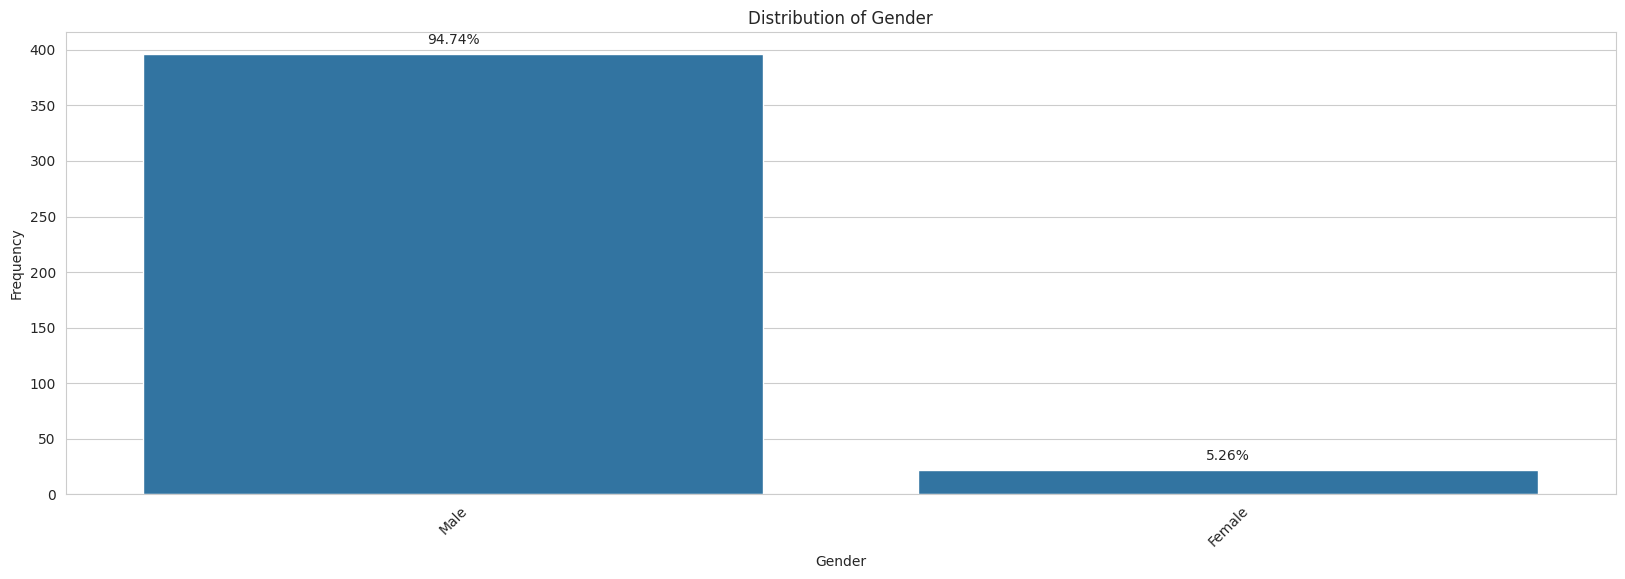

In [28]:
plot_countplot(df_proc_1, 'Gender')

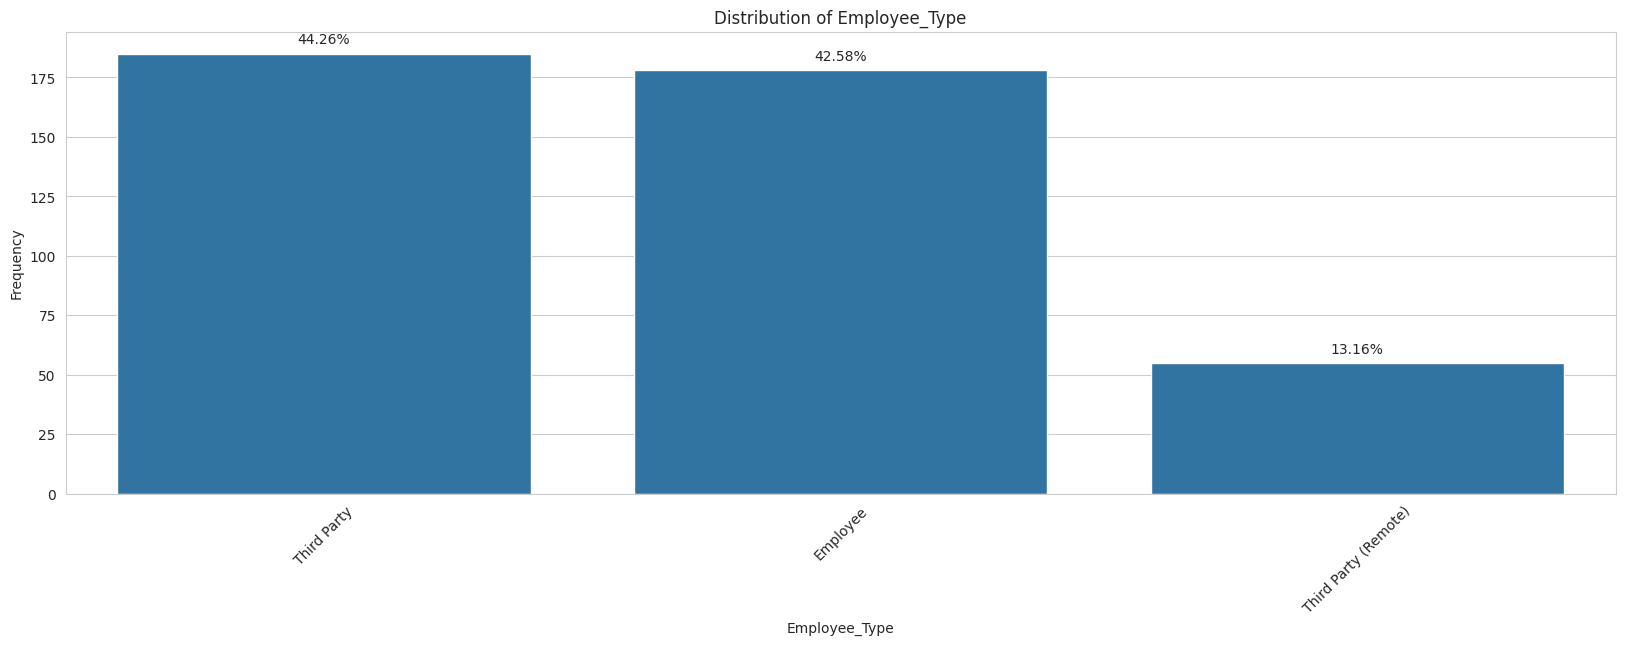

In [29]:
plot_countplot(df_proc_1, 'Employee_Type')

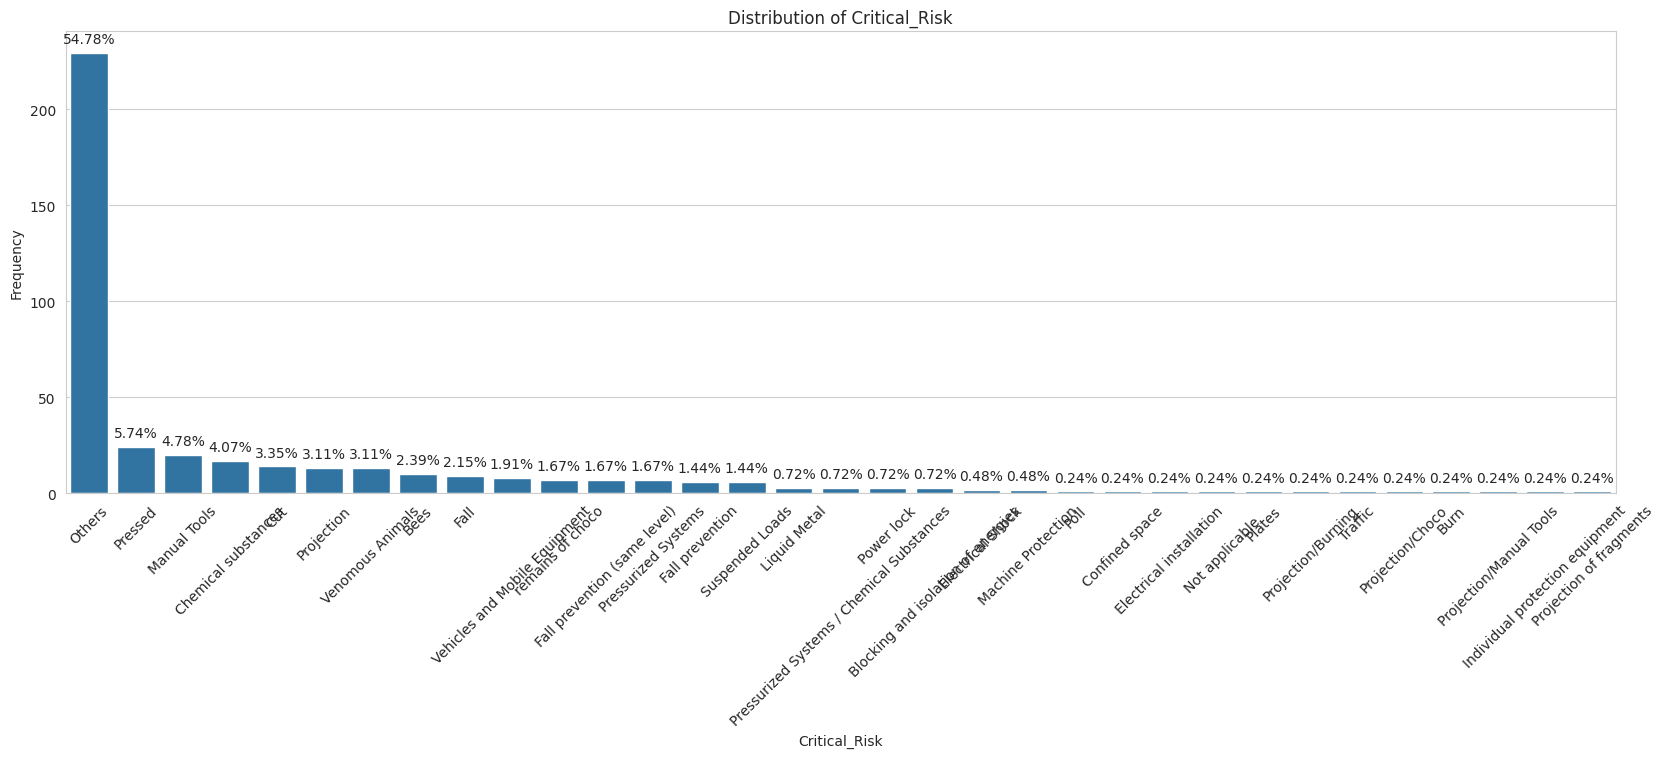

In [30]:
plot_countplot(df_proc_1, 'Critical_Risk')

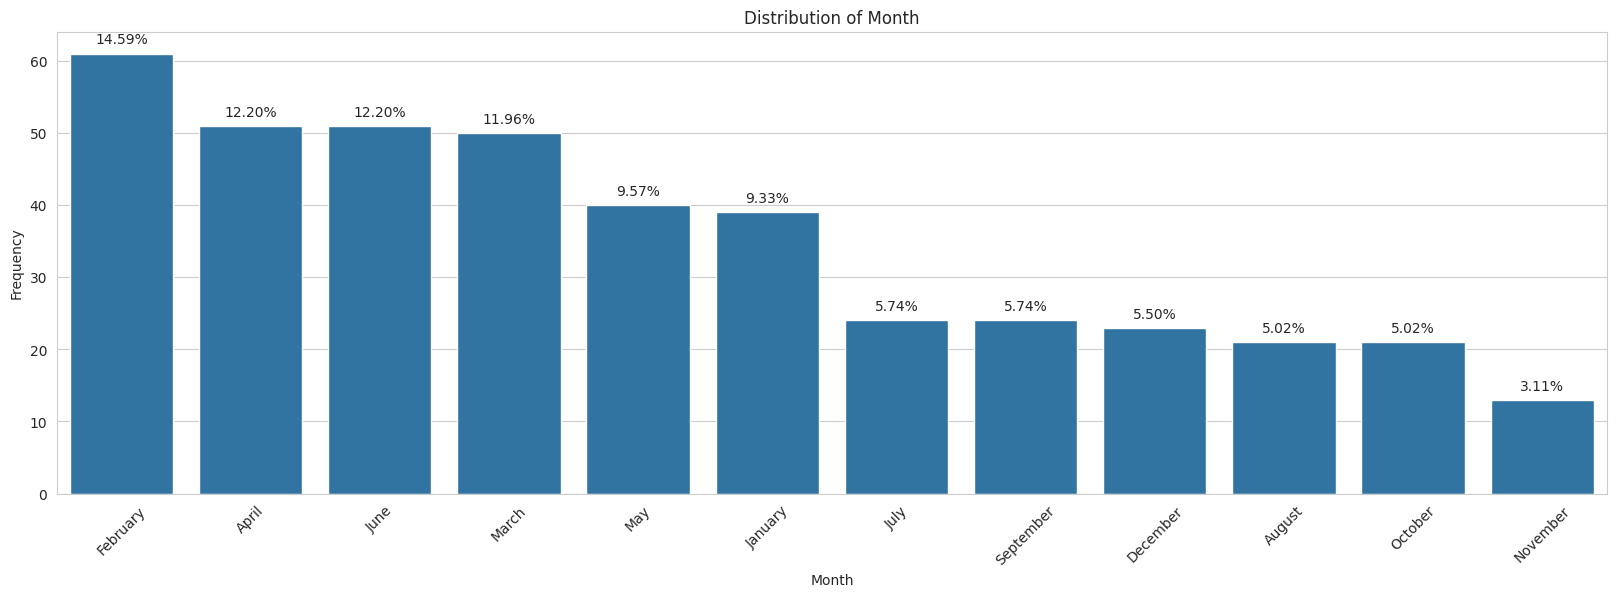

In [31]:
plot_countplot(df_proc_1, 'Month')

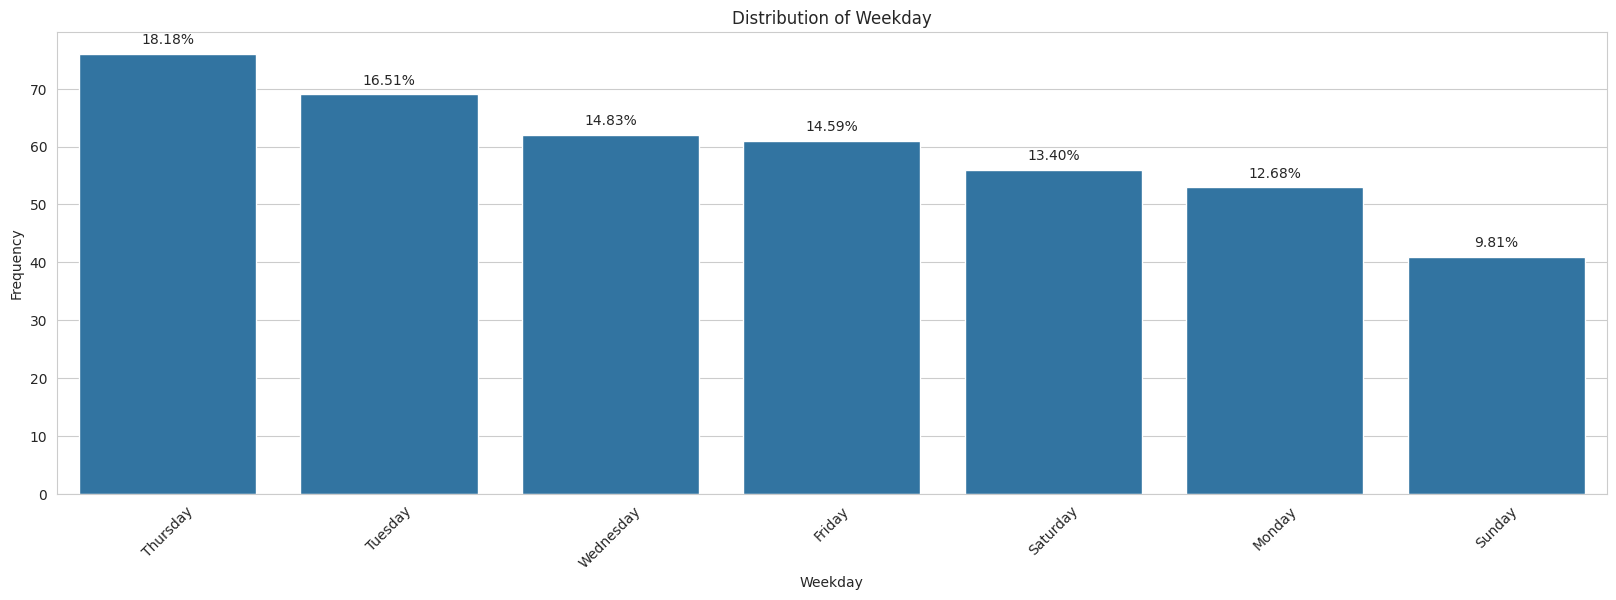

In [32]:
plot_countplot(df_proc_1, 'Weekday')

### Observations from the above univariate vizualization are:

#### Country

Data is available for only 3 countries. Country_01 is most pront to accidents followed by country 2

#### Industry Sector

Mining sector has the most accident cases than any other sector. Thus, we can say that jobs in the mining industry sector are more risky than metal or any other sector.

#### Gender

Dataset is more biased towards male employees, this is possible because Mining and Metal industries are more male dominant.  

#### Employee type

Total number of internal employees and Third Party employees is more or less the same. But, we can also see that Third party remote employees are comparatively less in number.

#### Local

 There is data for 12 locations across 3 countries. Local_03 has seen the maximum number of accidents, which is around 20% of all the accident cases recorded.

#### Critical Risk

Most of the Critical Risks are classified as 'Others'. It holds around 55% of the total Critical Risks. It is followed by Pressed, Manual tools, Chemical substances, etc.

#### Accident Level

*  Accident levels are mostly of Level 1 with 74% of the data, followed by 9/.5% of level 2 and ~7% for levels 3 and 4 and ~2% for level 5. There have been no accidents of level 6 which is the highest level.

#### Potential Accident Level

Potential accident level indicates how severe the accident would have been due to other factors involved in the accidents. As per the graph, level IV has the highest count, which corresponds to moderate severity of accidents.


### **Bivariate Analysis**

#### **Distribution of features by Accident Level**

In [37]:
# Function to plot the distribution of accident levels by input column
def plot_accident_levels(df_temp, column, figsize=(20, 6), title_fontsize=15, label_fontsize=12, ticks_fontsize=10):
    plt.figure(figsize=figsize)
    sns.countplot(data=df_temp, x=column, hue='Accident_Level', order=df_temp[column].value_counts().index, dodge=False)
    plt.title(f'Distribution of Accident Levels by {column}', fontsize=title_fontsize)
    plt.xlabel(column, fontsize=label_fontsize)
    plt.xticks(rotation=90, fontsize=ticks_fontsize)
    plt.ylabel('Frequency', fontsize=label_fontsize)
    plt.legend(title='Accident Level', fontsize=ticks_fontsize, title_fontsize=label_fontsize)
    plt.show()

In [38]:
# Defining a function to further create Pie Charts

def plot_each_pieChart(df_temp,columnName,columnValue,targetColumn ):
  plt.pie(df_temp[df_temp[columnName]==columnValue][targetColumn].value_counts(),labels=df_temp[df_temp[columnName]==columnValue][targetColumn].value_counts().index,autopct='%1.1f%%');

def plot_pieChartshowAllPiesForColumn(df_temp, columnName,targetColumn,columnsPerRow):
  noOfUniques=len(df_temp[columnName].unique())
  noOfColumns=columnsPerRow
  noOfRows=int(np.ceil(noOfUniques/noOfColumns))
  #fig, axes = plt.subplots(noOfRows,noOfColumns, figsize=(noOfColumns*5,noOfRows*5))
  #fig.tight_layout()
  plt.figure(figsize=(noOfColumns*4,noOfRows*4));
  for i, column in enumerate(df_temp[columnName].unique()):
    plt.subplot(noOfRows,noOfColumns,i+1)
    plot_each_pieChart(df_temp,columnName,column,targetColumn)
    plt.title('Accident Level vs '+column)
  plt.show()

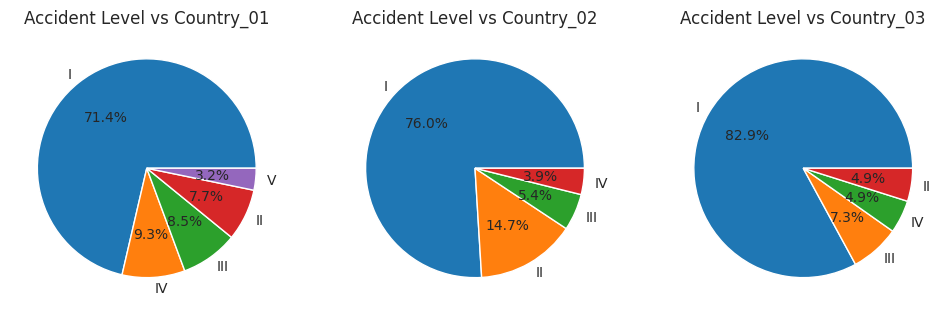

In [39]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Country','Accident_Level', 3)

* More than 70% accidents in all three countries are Level 1 accidents.
* Severity of accidents are highest in count_01. All the Level 5 accidents occured only in country_01. It would be interesting to investigate further to know the reason for this. Why the most severe accidents are specific to country_01?

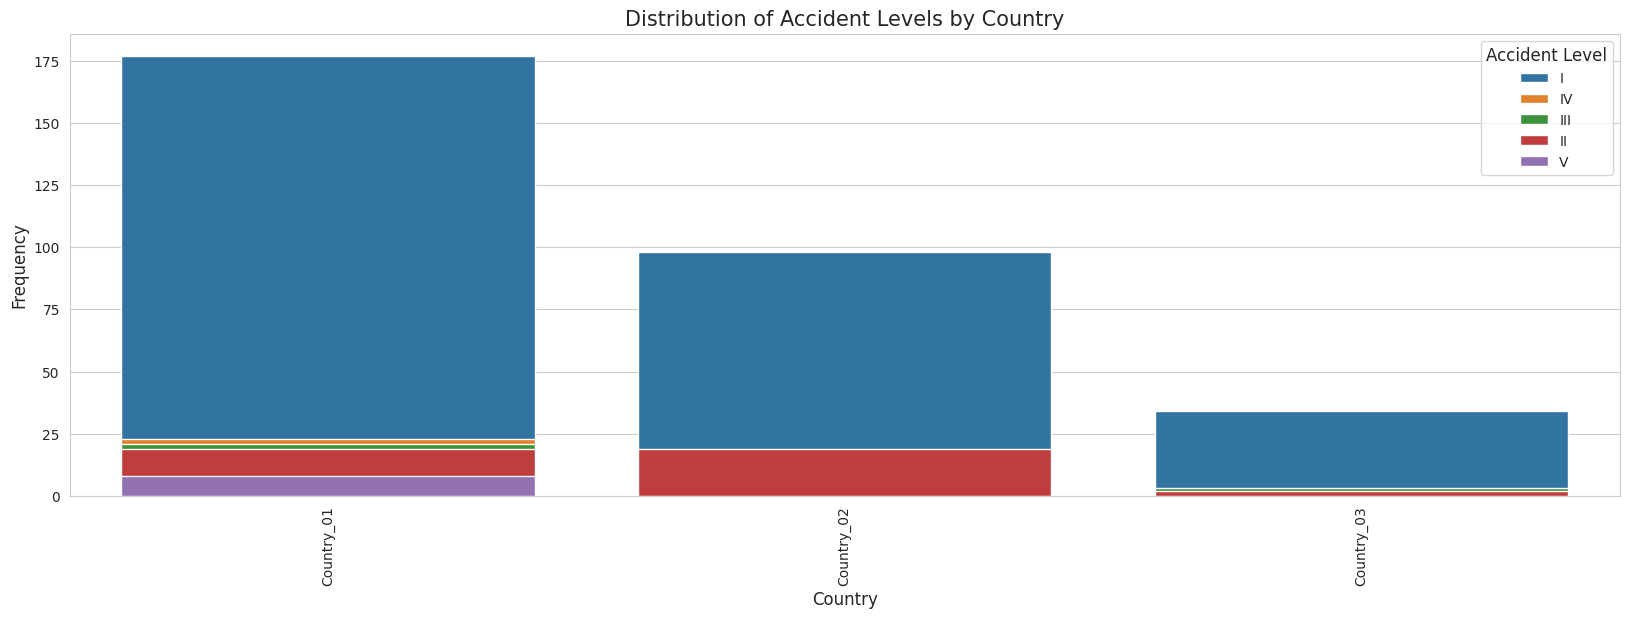

In [40]:
plot_accident_levels(df_proc_1, 'Country')

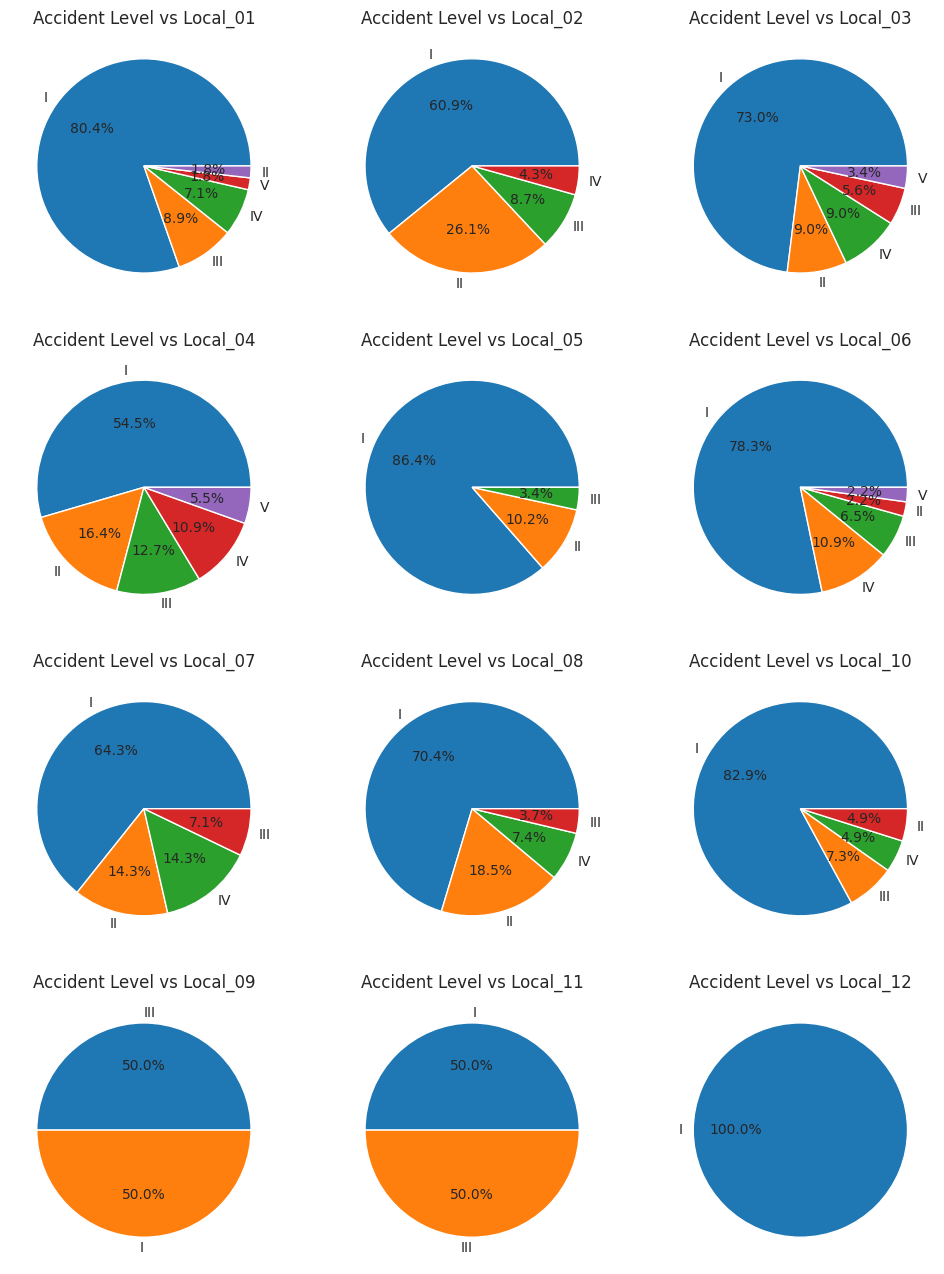

In [41]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Location','Accident_Level', 3)

1.   Majority of accidents in all localities are level 1 accidents. (In fact,   local_12 observed only level 1 accidents.)

2. Local_09 and local_11 observed only level 1 and 3 accidents, that too in equal proportion.

3. We can observe that the proportion of Level 4 and level 5 accidents is the highest in local_04.

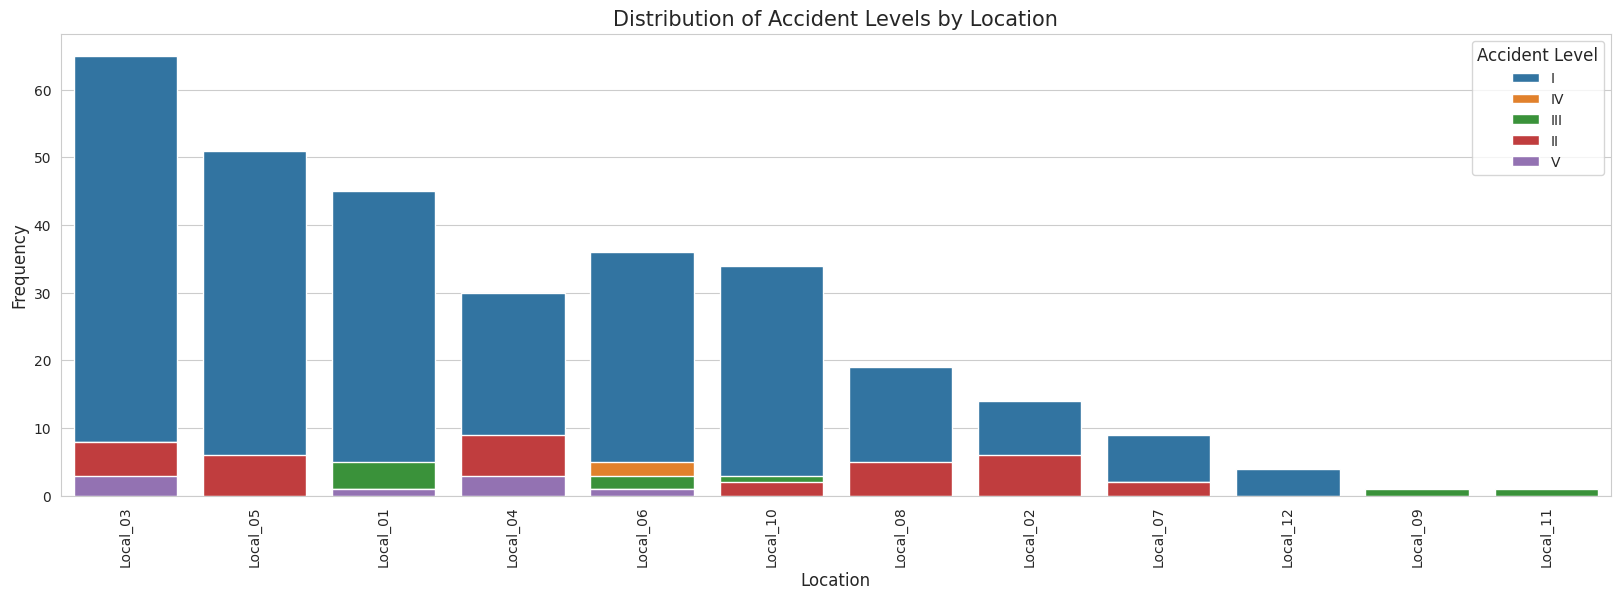

In [42]:
plot_accident_levels(df_proc_1, 'Location')

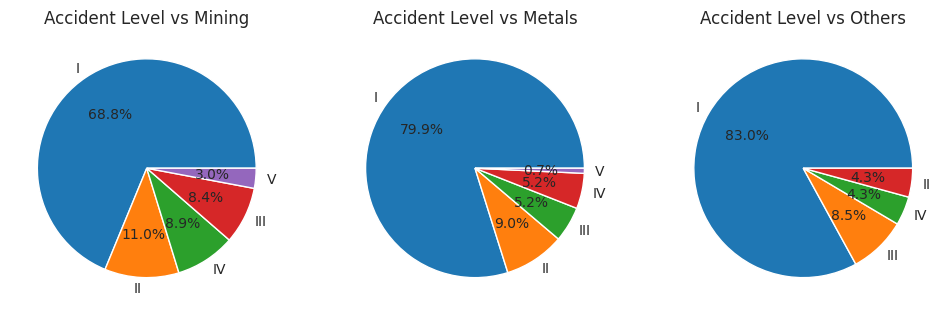

In [43]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Industry_Sector','Accident_Level', 3)

1. Mining sector has highest proportion of level 4 and level 5 accidents among all the sectors.
2. Proportion of level 1 accidents is highest in Others Sector.

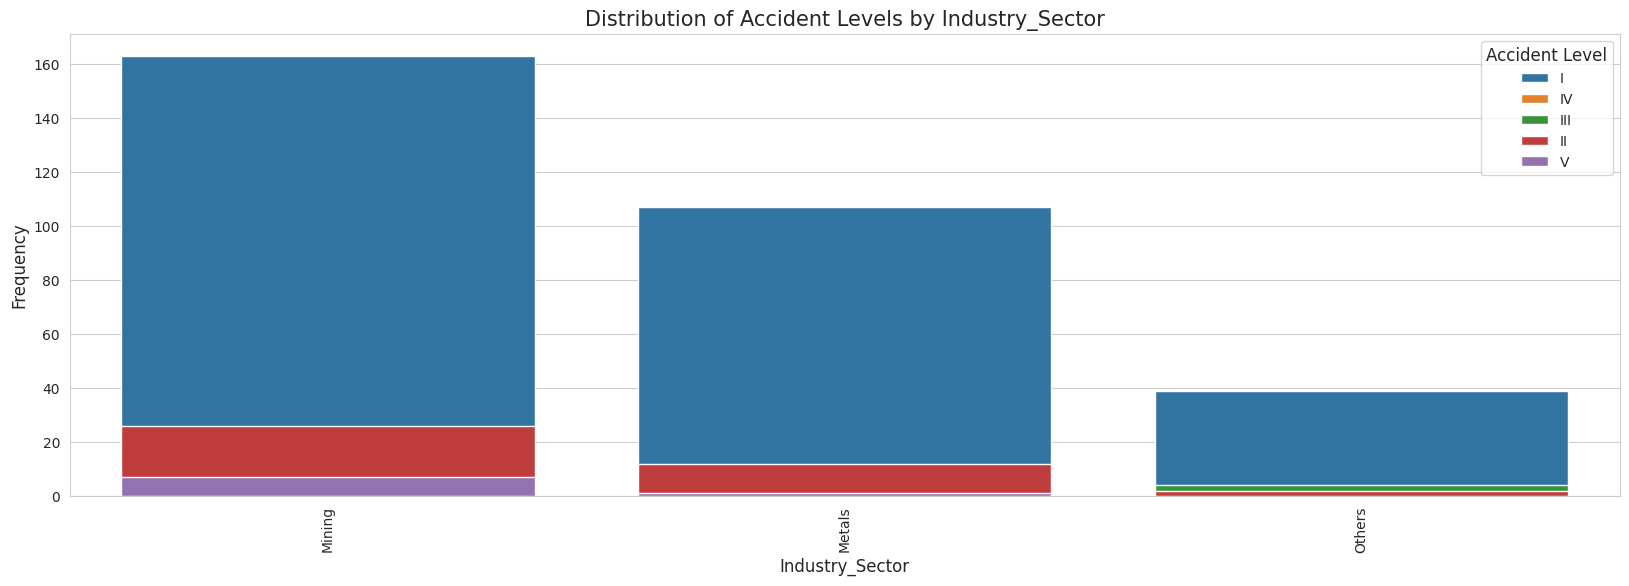

In [44]:
plot_accident_levels(df_proc_1, 'Industry_Sector')

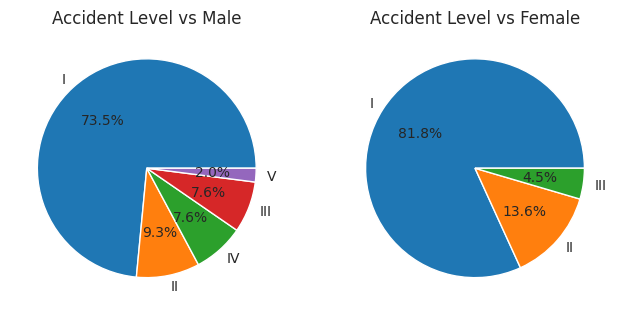

In [45]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Gender','Accident_Level', 3)

1. Men have faced more severe accidents than women.
2. Around 10% of overall accidents faced by men are level 4 and level 5 accidents, whereas women did not face any level 4 or 5 accident.
3. More than 80% of accidents faced by women are level 1 accidents.

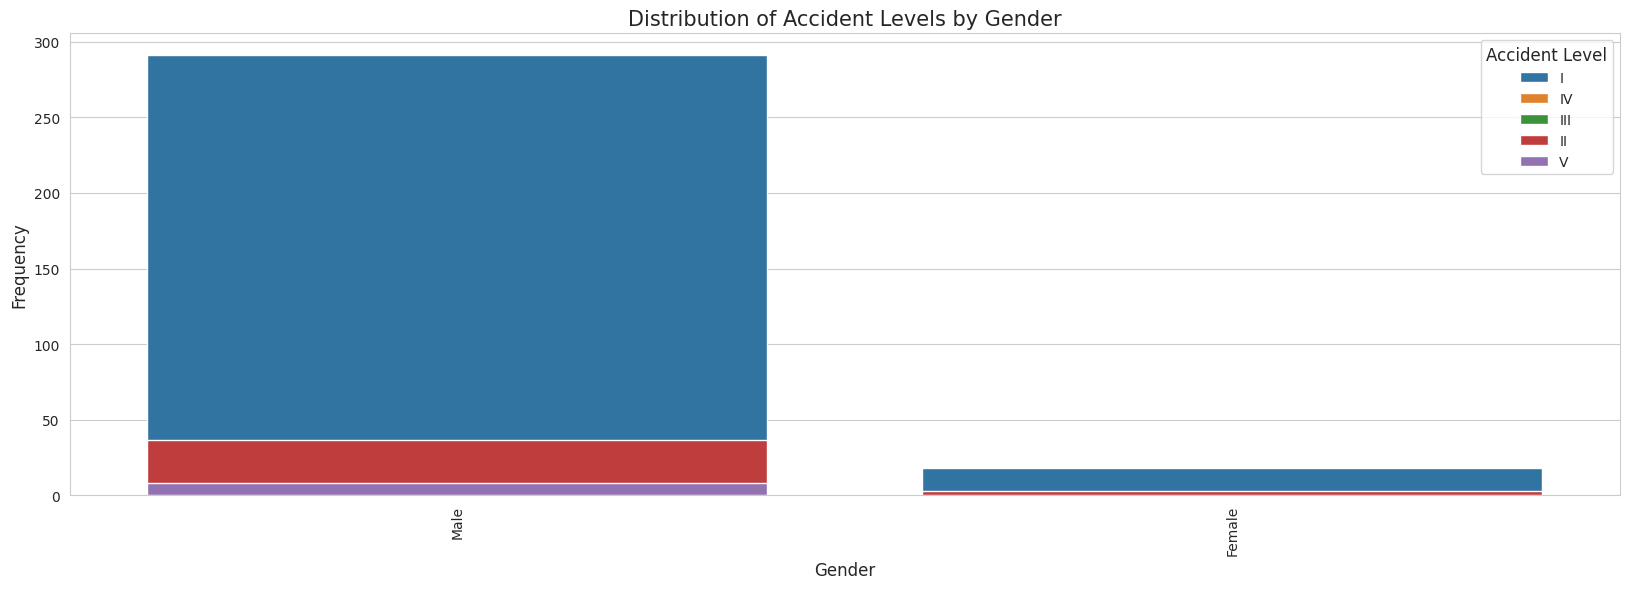

In [46]:
plot_accident_levels(df_proc_1, 'Gender')

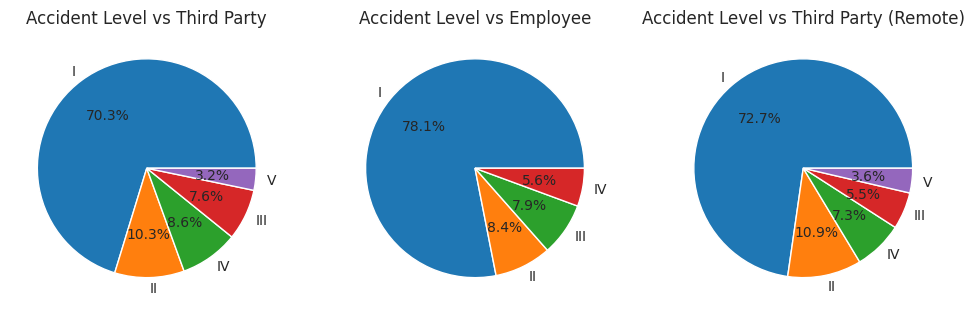

In [47]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Employee_Type','Accident_Level', 3)

1. Level 1 accidents for all employee types is over 70%.
2. Internal employees did not face any level 5 accident, whereas proportion of level 5 accidents for both Third Party and Third Party remote is roughly the same.
3. This tells us that it is slightly more risky to be a Third party or remote employee than to be an internal employee.

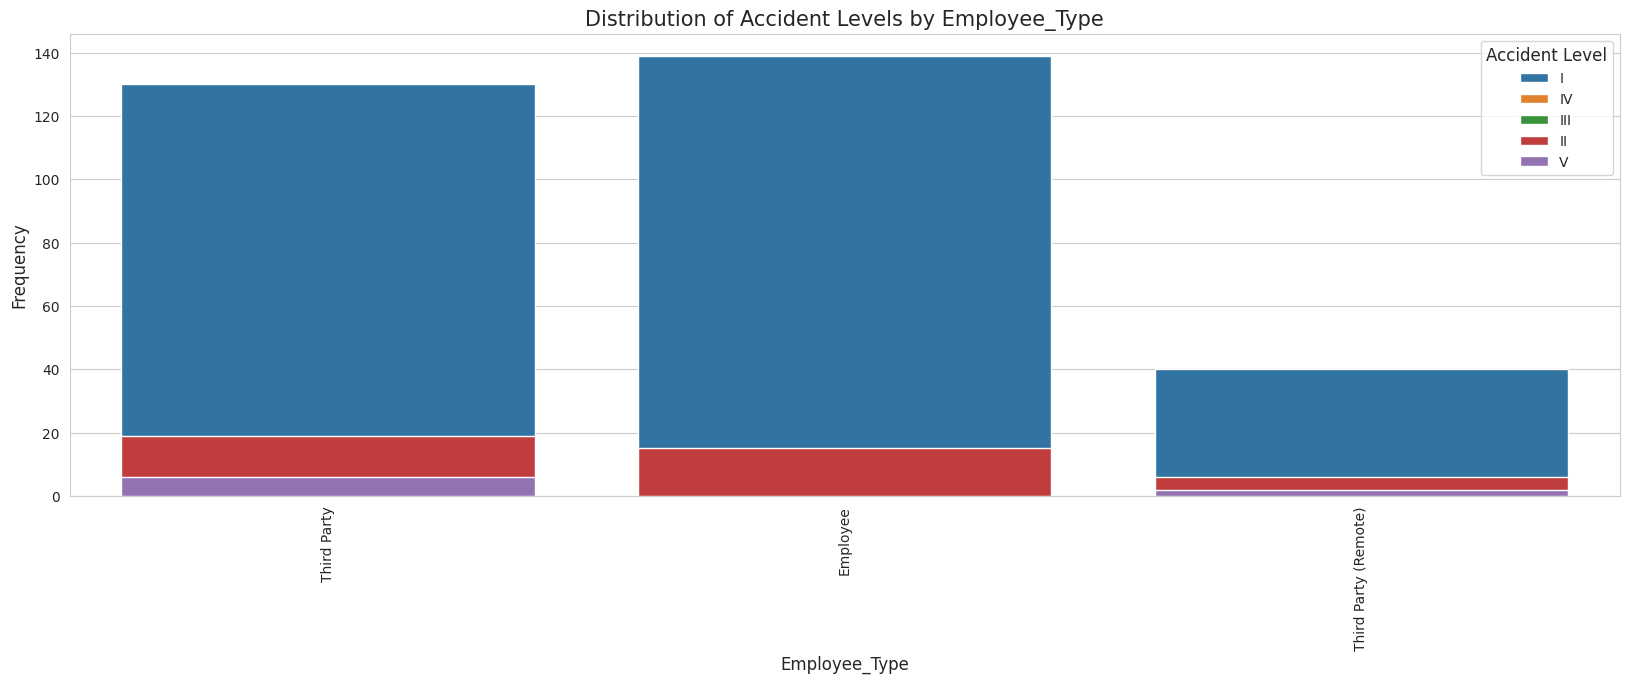

In [48]:
plot_accident_levels(df_proc_1, 'Employee_Type')

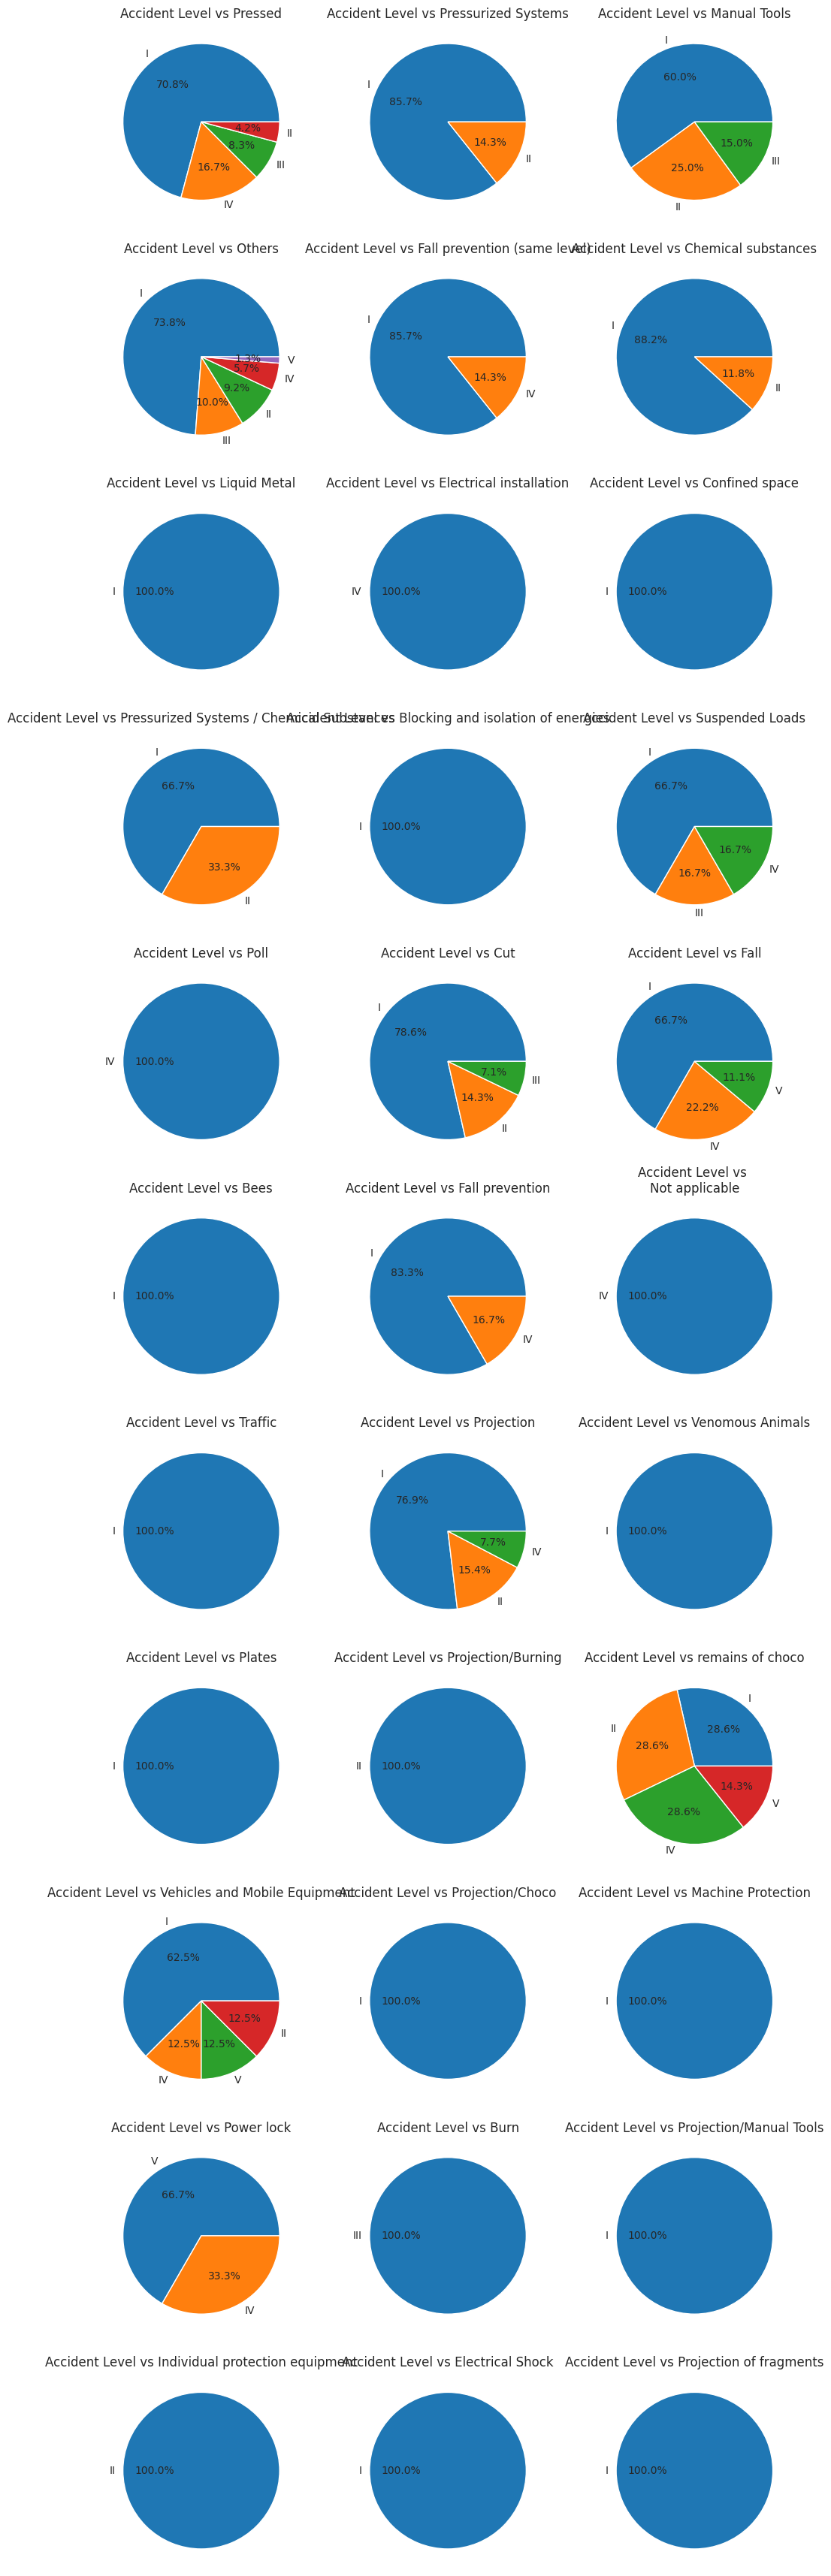

In [49]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Critical_Risk','Accident_Level', 3)

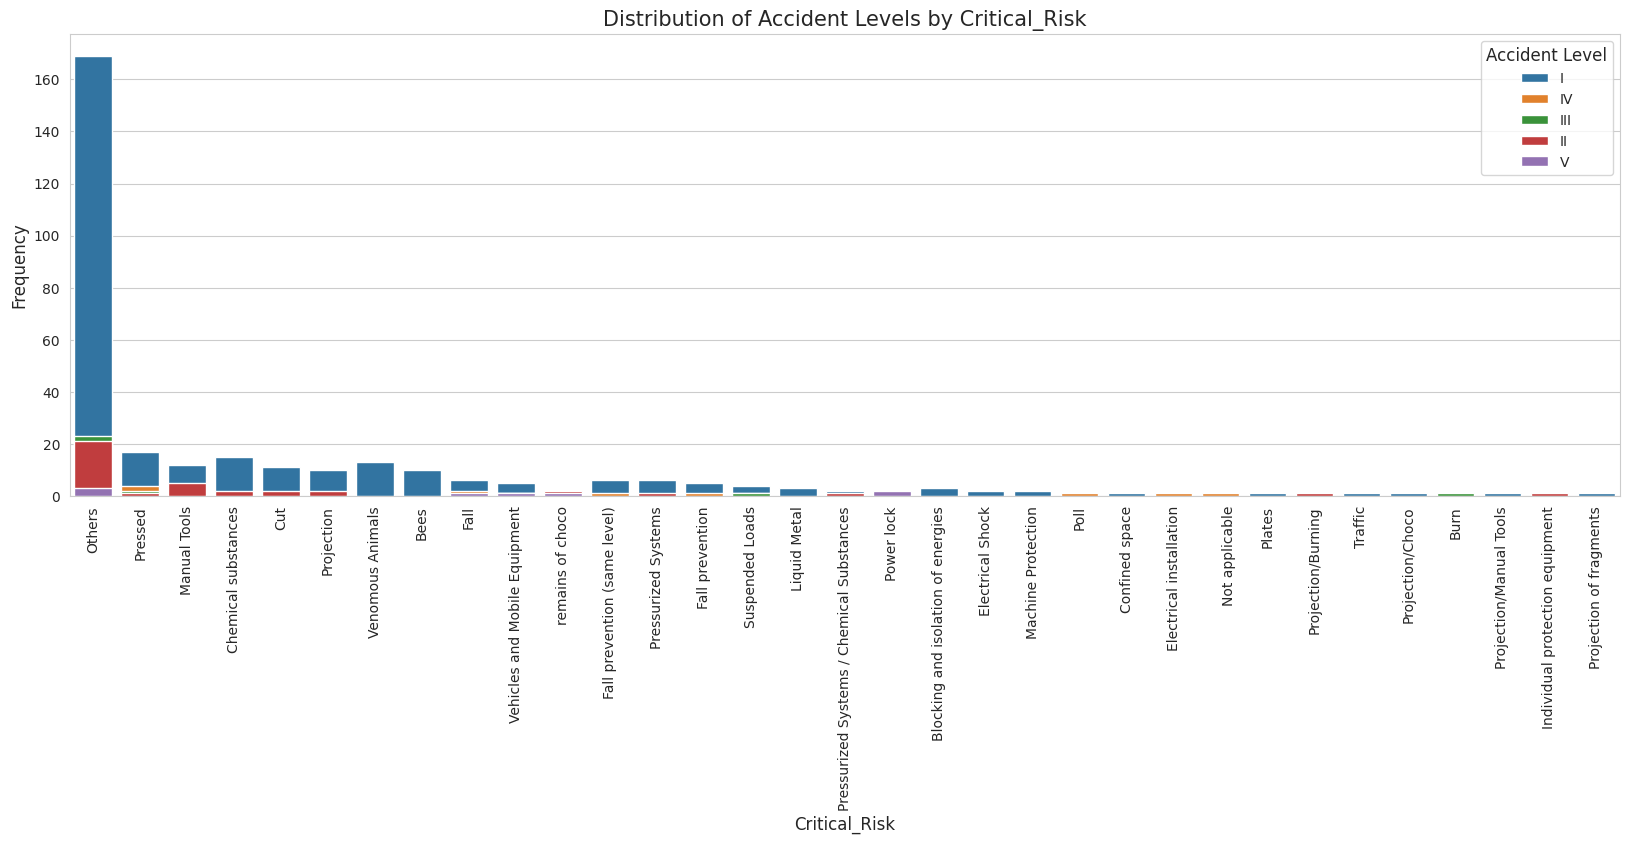

In [50]:
plot_accident_levels(df_proc_1, 'Critical_Risk')

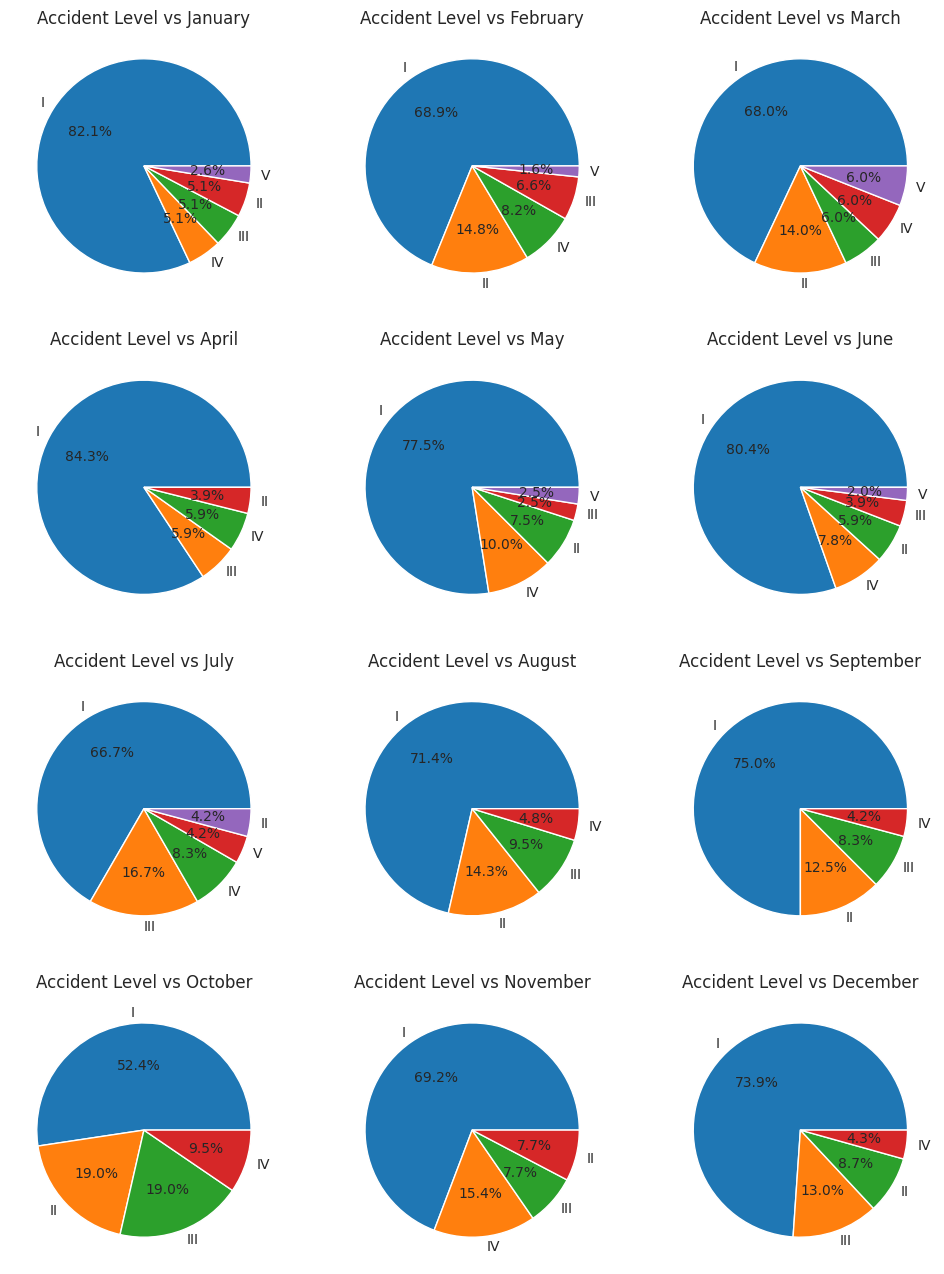

In [51]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Month','Accident_Level', 3)

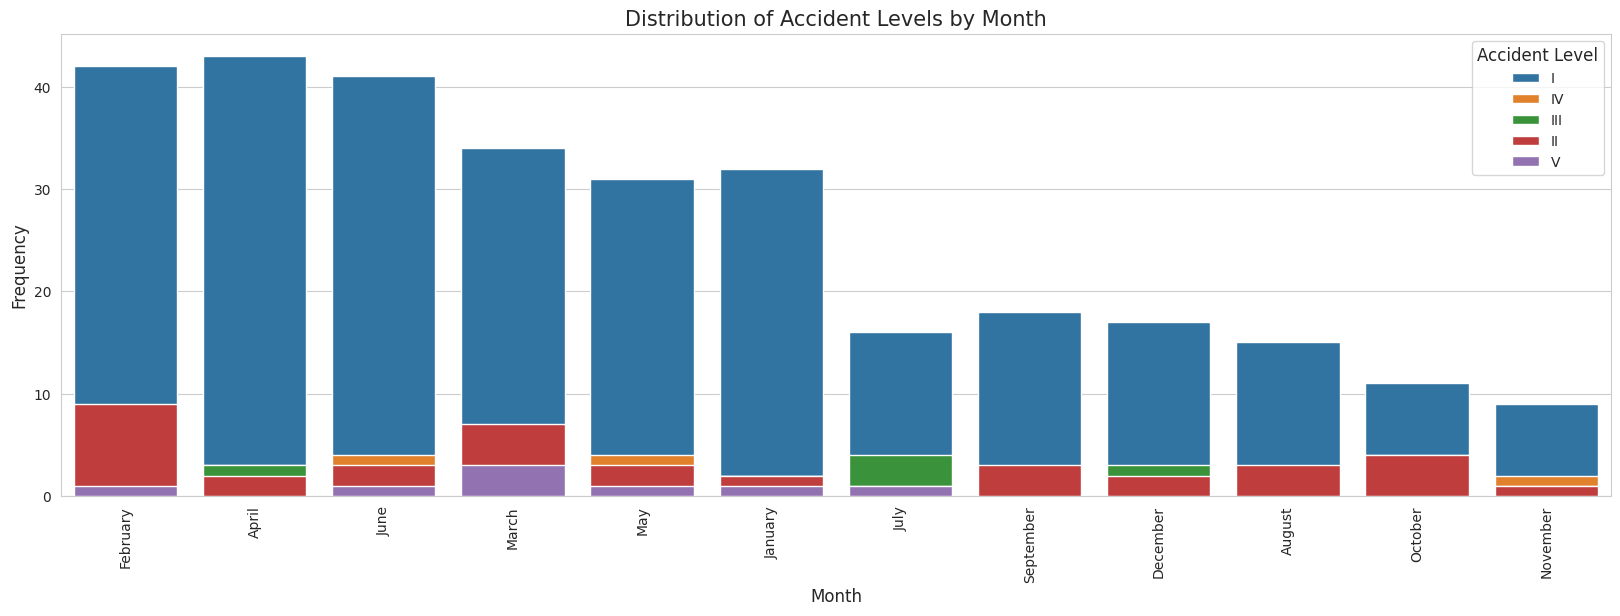

In [52]:
plot_accident_levels(df_proc_1, 'Month')

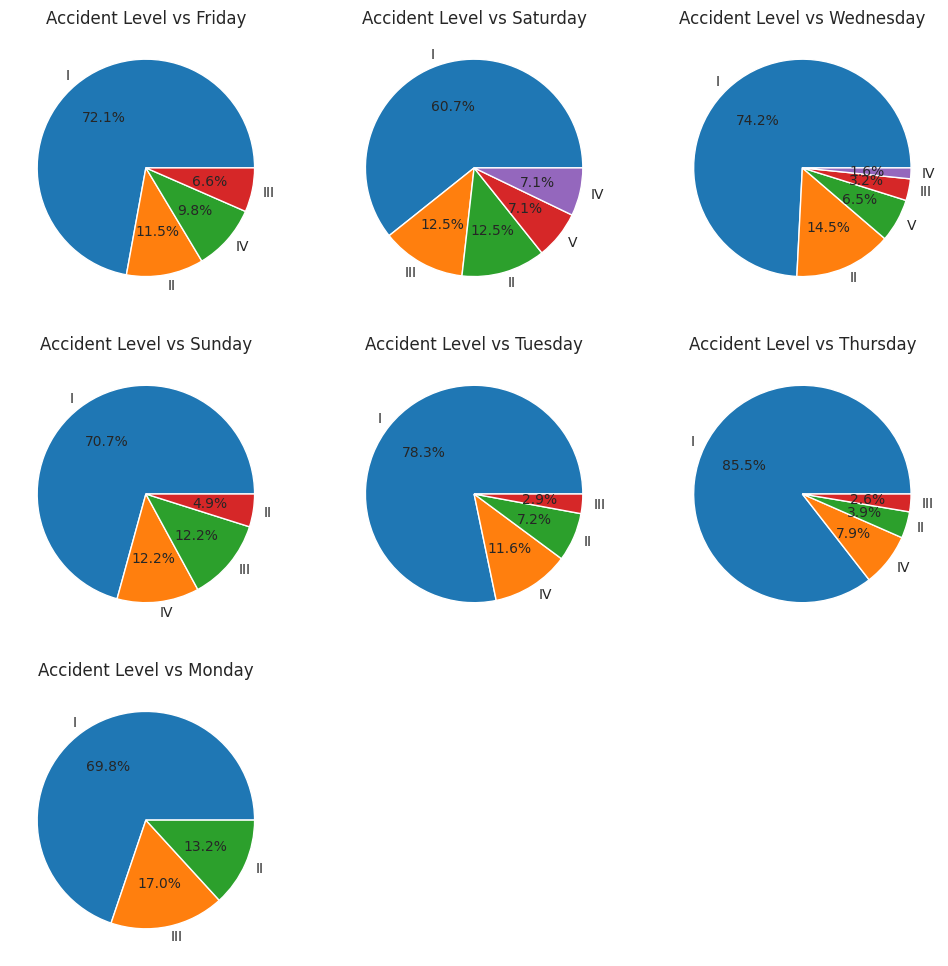

In [53]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Weekday','Accident_Level', 3)

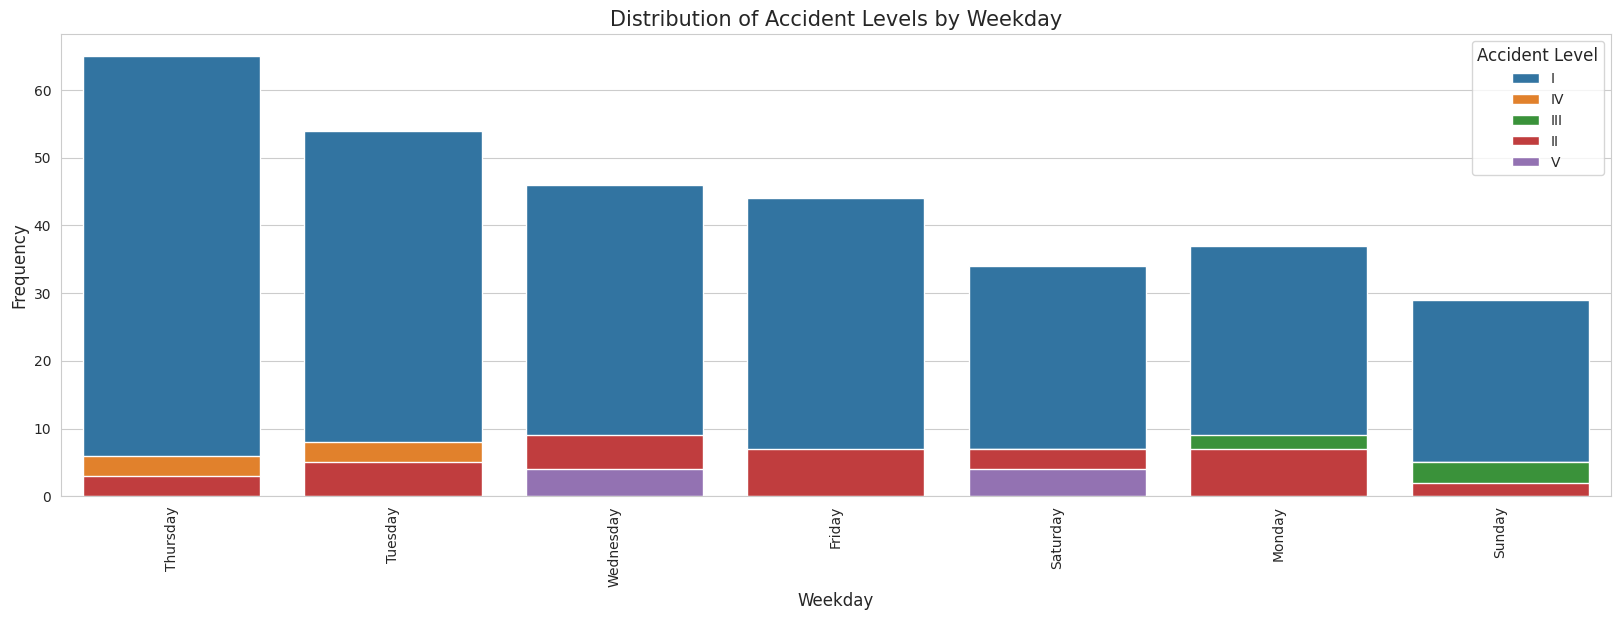

In [54]:
plot_accident_levels(df_proc_1, 'Weekday')

#### **Relationship between Accident Level and Potential Accident Level**

Convert the ordinal levels of `Accident Level` and `Potential Accident Level` from Roman to integers.

In [55]:
# Convert ordinal levels to numeric
df_proc_2 = df_proc_1.copy()

ordinal_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}

df_proc_2['Accident_Level'] = df_proc_2['Accident_Level'].map(ordinal_mapping)
df_proc_2['Potential_Accident_Level'] = df_proc_2['Potential_Accident_Level'].map(ordinal_mapping)

# Print the unique values of Accident_Level and Potential_Accident_Level
unique_values(df_proc_2.loc[:, ['Accident_Level', 'Potential_Accident_Level']])

Accident_Level: [1 4 3 2 5]
-----------------------------------
Potential_Accident_Level: [4 3 1 2 5 6]
-----------------------------------


In [56]:
pd.crosstab(df_proc_2['Accident_Level'], df_proc_2['Potential_Accident_Level'])

Potential_Accident_Level,1,2,3,4,5,6
Accident_Level,,,,,,
1,45,88,89,78,9,0
2,0,7,14,16,3,0
3,0,0,3,26,2,0
4,0,0,0,21,9,0
5,0,0,0,0,7,1


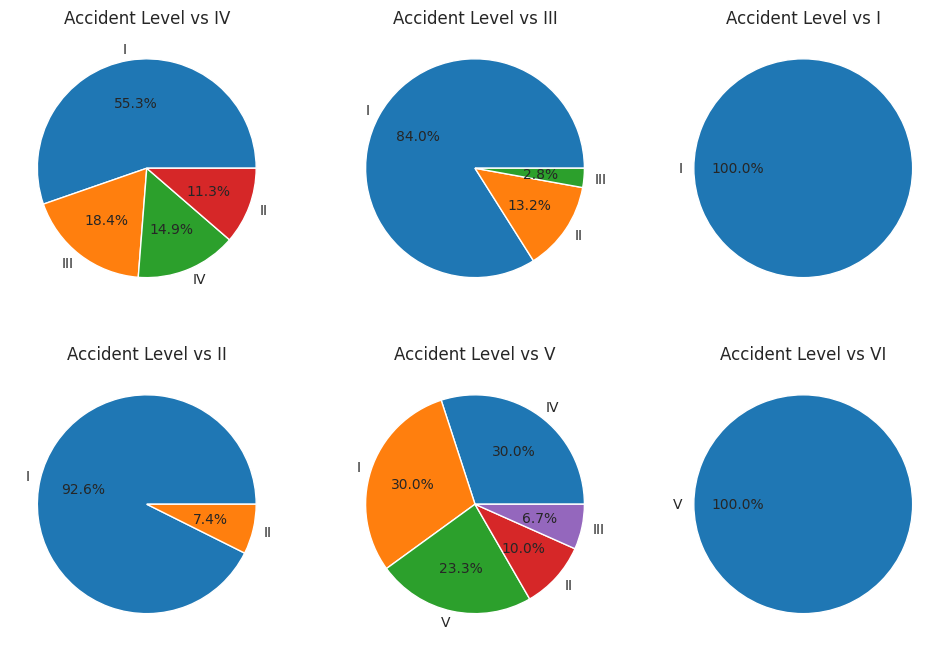

In [57]:
plot_pieChartshowAllPiesForColumn(df_proc_1, 'Potential_Accident_Level','Accident_Level', 3)

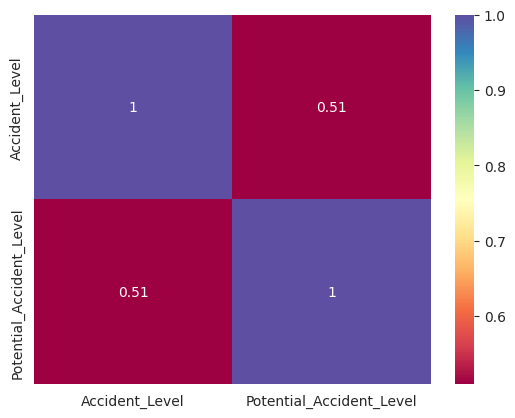

In [58]:
# Visualizing a heatmap to show correlation between 'Accident Level' & 'Potential Accident Level'

sns.heatmap(df_proc_2[['Accident_Level','Potential_Accident_Level']].corr(),annot=True,cmap='Spectral');

In [59]:
print('Between Accident_Level and Potential_Accident_Level:')

# Calculate the Pearson correlation coefficient for Accident_Level and Potential_Accident_Level
person_correlation = df_proc_2['Accident_Level'].corr(df_proc_2['Potential_Accident_Level'])
print(f'The Pearson correlation coefficient is {person_correlation:.2f}')

# Calculate the Spearman correlation coefficient for Accident_Level and Potential_Accident_Level
spearman_correlation = df_proc_2['Accident_Level'].corr(df_proc_2['Potential_Accident_Level'], method='spearman')
print(f'The Spearman correlation coefficient is {spearman_correlation:.2f}')

Between Accident_Level and Potential_Accident_Level:
The Pearson correlation coefficient is 0.51
The Spearman correlation coefficient is 0.50


In [60]:
# finding the average accident level across industry sectors

df_proc_2.groupby('Industry_Sector')['Accident_Level'].mean()

,Accident_Level
Industry_Sector,
Metals,1.380597
Mining,1.662447
Others,1.340426


In [61]:
# finding the average potential accident level across industry sectors

df_proc_2.groupby('Industry_Sector')['Potential_Accident_Level'].mean()

,Potential_Accident_Level
Industry_Sector,
Metals,2.813433
Mining,3.430380
Others,1.765957


The accident levels are more fatal in Mining industry.

**Observation and Inference:**
- Both correlation coefficients (0.51 for Pearson and 0.50 for Spearman) suggest a **_moderate positive relationship_** between `Accident_Level` and `Potential_Accident_Level`. This indicates that higher levels of accidents are likely associated with higher potential levels of accidents.
- The similarity in values (0.51 for Pearson and 0.50 for Spearman) suggests that the relationship is reasonably **_consistent across both linear and monotonic assessments_**. This consistency strengthens the reliability of the observed association.

**Given the requirement for this project, we would drop the column `Accident_Level` and consider `Potential_Accident_Level` as the target variable.**

**Setting the target column based on the observations**

In [62]:
targetColumn= "Accident_Level"

In [63]:
# Drop the 'Potential Accident_Level' column
df_proc_3 = df_proc_2.drop(columns=['Potential_Accident_Level'])
df_proc_3.head(3)

,Country,Location,Industry_Sector,Accident_Level,Gender,Employee_Type,Critical_Risk,Description,Month,Weekday
0,Country_01,Local_01,Mining,1,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",January,Friday
1,Country_02,Local_02,Mining,1,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",January,Saturday
2,Country_01,Local_03,Mining,1,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",January,Wednesday


## **NLP Data Preprocessing**

#### Cleaning the Description column

From visual analysis, following are the observations from the `Description` column:
- Presence of numbers.
- Presence of person and company names
- Duplicate descriptions corresponding to same Potential_Accident_Level but having other features different.
- Presence of special characters - degree sign, colon, hyphen, bracket, quotes, etc.
- Incorrect spellings of few words.
- All in English language.

Steps for Data Preprocessing:
1. Stop words removal
2. Remove Special Characters
3. Removing unwanted spaces
4. Remove Numbers (as in this numbers do not add any contextual value)
5. Remove case sensitiveness (will convert to lower case)
6. USe Lemmentization to bring words to their base form
7. Create Local Synonumn Library (specific for Mining and metal industry)
8. Add POS Tagging
9. SPell Checker

### Functions to create the pipeline

In [64]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    cleaned_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return cleaned_text


In [65]:
def apply_SpellChecker(text):

    """Corrects spelling errors in a given text.

    Args:
        text (str): The text to correct.

    Returns:
        str: The corrected text.
    """

    spell = SpellChecker()

    words = text.split()
    corrected_text = []

    for word in words:
        corrected_word = spell.correction(word)
        corrected_text.append(corrected_word)
        #print(corrected_word)

    #return " ".join(corrected_text if corrected_text is not None)
    return " ".join(str(item) for item in corrected_text if item is not None)


In [68]:
#df_proc_3["Description"].apply()
#df_proc_3["Description"].head(5)
print(apply_SpellChecker("Teting for spel checker"))

testing for spell checker


In [73]:
# defining a function to perform lemmentization
def apply_lemmentization(text):
    """Lemmatizes a given text.

    Args:
        text (str): The text to lemmatize.

    Returns:
        str: The lemmatized text.
    """

    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]

    return " ".join(str(item) for item in lemmatized_words)

In [74]:
print(apply_lemmentization('I am walking to the door'))

I be walk to the door


In [75]:
# Function to convert the text to lowercase
def convert_to_lower(text):
    return text.lower()

In [79]:
df_proc_4 = df_proc_3.copy()
df_proc_4['Cleaned_text'] = df_proc_4['Description'].apply(convert_to_lower)

print(df_proc_4['Description'][71])

being approximately 14:25 h when supervising the line clamping of the pom d071 roy canario returning to the thickener d1304 hits his nose with the metal chute out of operation.


In [76]:
def remove_extra_spaces(text):
  # removing extra whitespaces from the text
  return text.str.strip()

We observe quite a few mentions of time in various formats. e.g. "9:45 am", "14:16", "04:50 p.m.", etc. Let us replace all these with period of the day - morning, afternoon, evening or night.

In [77]:
import re

def get_time_period(time_str):
        # Convert 12-hour and 24-hour times to period
        try:
            # Handle 12-hour format with AM/PM
            if 'a.m.' in time_str.lower() or 'am' in time_str.lower():
                hour = int(re.findall(r'\d+', time_str)[0])
                if 5 <= hour < 12:
                    return 'morning'
                elif hour == 12:
                    return 'noon'
                else:
                    return 'early morning'

            # Handle 12-hour format with P.M.
            if 'p.m.' in time_str.lower() or 'pm' in time_str.lower():
                hour = int(re.findall(r'\d+', time_str)[0])
                if hour < 5:
                    return 'afternoon'
                elif 5 <= hour < 8:
                    return 'evening'
                else:
                    return 'night'

            # Handle 24-hour format
            hour = int(time_str.split(':')[0])
            if 5 <= hour < 12:
                return 'morning'
            elif 12 <= hour < 17:
                return 'afternoon'
            elif 17 <= hour < 20:
                return 'evening'
            else:
                return 'night'

        except (IndexError, ValueError):
            return time_str

# Function to convert numeric times to time periods (morning, afternoon, evening, night)
def convert_time_to_period(text):
    # Regex patterns for different time formats
    patterns = [
        r'\d{1,2}:\d{2}\s*(?:a\.m\.|am)',
        r'\d{1,2}:\d{2}\s*(?:p\.m\.|pm)',
        r'\d{1,2}:\d{2}'
    ]

    # Replace times with periods
    for pattern in patterns:
        text = re.sub(pattern,
                      lambda m: get_time_period(m.group(0)),
                      text,
                      flags=re.IGNORECASE)

    return text

In [80]:
# to use regular expressions for manipulating text data
import re
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match alphanumeric characters (numbers also need to be removed)
    pattern = '[^A-Za-z]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [82]:

df_proc_5 = df_proc_4.copy()
df_proc_5['Description'] = df_proc_5['Description'].apply(convert_time_to_period)

print(df_proc_4['Description'][71], df_proc_5['Description'][71])

being approximately 14:25 h when supervising the line clamping of the pom d071 roy canario returning to the thickener d1304 hits his nose with the metal chute out of operation. being approximately afternoon h when supervising the line clamping of the pom d071 roy canario returning to the thickener d1304 hits his nose with the metal chute out of operation.


The description contains names of person and places. Let us use a pretrained model from Hugging Face to extract and replace the named entities from the text.

In [83]:
# Load the pre-trained NER model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Check if GPU is available and set the device
device = 0 if torch.cuda.is_available() else -1

model_name = "dslim/distilbert-NER"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/926 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

In [84]:
# Function to detect and replace names
def detect_replace_names(text):
    # Load the NER pipeline
    ner = pipeline('ner', model=model, tokenizer=tokenizer, device=device)

    # Detect names in the text
    entities = ner(text)

    # Replace names with string 'NAME'
    for entity in entities:
        if entity['entity'] == 'I-PER' or entity['entity'] == 'B-PER':
            text = text.replace(entity['word'], '[NAME]')
        elif entity['entity'] == 'I-ORG' or entity['entity'] == 'B-ORG':
            text = text.replace(entity['word'], '[ORGANIZATION]')
        elif entity['entity'] == 'I-LOC' or entity['entity'] == 'B-LOC':
            text = text.replace(entity['word'], '[LOCATION]')
        elif entity['entity'] == 'I-MISC' or entity['entity'] == 'B-MISC':
            text = text.replace(entity['word'], '[MISC]')

    return text

In [90]:
df_proc_6 = df_proc_5.copy()


In [91]:
#df_proc_6 = df_proc_5.copy()
df_proc_6['Description'] = df_proc_6['Description'].apply(detect_replace_names)

print(df_proc_5['Description'][3])

Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set 

being morning. approximately in the nv. 1880 cx-695 ob7, the personnel begins the task of unlocking the soquet bolts of the bhb machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding mr. cristóbal - auxiliary assistant to climb to the platform to exert pressure with your hand on the "dado" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.


In [92]:
# Combined text processing pipeline function
def text_processing_pipeline(text):
    text = detect_replace_names(text)
    text = convert_to_lower(text)
    text = convert_time_to_period(text)
    text = remove_special_characters(text)
    text = apply_SpellChecker(text)
    text= remove_stopwords(text)
    text = apply_lemmentization(text)


    return text

In [93]:
df_proc_4 = df_proc_3.copy()
df_proc_4['Org_Description']=df_proc_4['Description']
df_proc_4['Description'] = df_proc_4['Description'].apply(text_processing_pipeline)

Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set to use cuda
Device set 

In [94]:
df_proc_4[['Org_Description','Description']].head(3)

,Org_Description,Description
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",remove drill rod miss mob miss maintenance supervisor proceed loosen support intermediate centralizer facilitate removal see mechanic support one end drill equipment pull hand bar accelerate removal moment bar slide point support tighten finger mechanic drill bar beam jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",activation sodium sulfide pump pip uncouple sulfide solution design area reach maid immediately make use emergency shower direct ambulatory doctor later hospital note sulfide solution grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",sub station organization lo locate level collaborator excavation work pick hand tool hit rock flat part beak bounce hit steel tip safety shoe metatarsal area leave foot collaborator cause injury


#### Feature Selection
We will drop a few columns which will not contribute to the model predictions: Date, Country, Local, Potential Accident Level

In [98]:
df_proc_5 =df_proc_4.copy()

In [99]:
df_proc_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          418 non-null    object
 1   Location         418 non-null    object
 2   Industry_Sector  418 non-null    object
 3   Accident_Level   418 non-null    int64 
 4   Gender           418 non-null    object
 5   Employee_Type    418 non-null    object
 6   Critical_Risk    418 non-null    object
 7   Description      418 non-null    object
 8   Month            418 non-null    object
 9   Weekday          418 non-null    object
 10  Org_Description  418 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.0+ KB


In [101]:
# Dropping the columns which are not relevant to the prediction from our models: Date, Country, Local
df_proc_5 = df_proc_5.drop([ 'Country', 'Location', 'Month', 'Weekday' , 'Org_Description'], axis=1)

#### One-hot encoding for the categorical columns

Let us perform one-hot encoding for the following categorical columns:
- `Country`: Different countries represented
- `Location`: Different city/plant locations
- `Industry_sector`: Various industrial sectors
- `Gender`: Male/Female categories
- `Employee_Type`: Employee or external worker
- `Critical_Risk`: Different risk categories

The other columns do not require one-hot encoding, since they are `Date` or `Description` or `Accident levels` which are ordinal in nature.

In [102]:
columns_to_encode = ['Country', 'Location', 'Industry_Sector', 'Gender', 'Employee_Type', 'Critical_Risk']

# One hot encode the columns
one_hot = pd.get_dummies(df_proc_1[columns_to_encode], prefix=columns_to_encode, dtype=int)
one_hot.head(3)

,Country_Country_01,Country_Country_02,Country_Country_03,Location_Local_01,Location_Local_02,Location_Local_03,Location_Local_04,Location_Local_05,Location_Local_06,Location_Local_07,...,Critical_Risk_Projection,Critical_Risk_Projection of fragments,Critical_Risk_Projection/Burning,Critical_Risk_Projection/Choco,Critical_Risk_Projection/Manual Tools,Critical_Risk_Suspended Loads,Critical_Risk_Traffic,Critical_Risk_Vehicles and Mobile Equipment,Critical_Risk_Venomous Animals,Critical_Risk_remains of choco
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create Word Embeddings

## Using Word2Vec

In [103]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in df_proc_5['Description'].values]

In [104]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [105]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2155


In [106]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [107]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [108]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(df_proc_5['Description'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Features '+str(i) for i in range(vec_size)])
df_Word2Vec

,Features 0,Features 1,Features 2,Features 3,Features 4,Features 5,Features 6,Features 7,Features 8,Features 9,...,Features 290,Features 291,Features 292,Features 293,Features 294,Features 295,Features 296,Features 297,Features 298,Features 299
0,0.001021,0.067695,-0.001047,0.032422,0.019764,-0.056278,0.037534,0.124283,0.013313,-0.006490,...,0.011945,0.078938,0.035377,-0.000406,0.061391,0.080982,-0.006210,-0.027452,0.044333,-0.004167
1,0.000587,0.029558,-0.000029,0.013777,0.008976,-0.025274,0.016819,0.055392,0.006116,-0.003114,...,0.005697,0.036352,0.015860,-0.000368,0.027943,0.036672,-0.003816,-0.013013,0.019558,-0.002207
2,0.001489,0.069734,-0.001384,0.032677,0.020299,-0.058306,0.039199,0.128552,0.014124,-0.006821,...,0.012733,0.081116,0.036419,-0.000957,0.062947,0.083356,-0.007068,-0.029352,0.045942,-0.005148
3,0.001030,0.074862,-0.000811,0.036417,0.020933,-0.062610,0.042510,0.138221,0.013884,-0.007409,...,0.013289,0.087033,0.040100,-0.001089,0.067841,0.089082,-0.007070,-0.030998,0.049150,-0.006041
4,0.001460,0.072652,-0.001097,0.034988,0.021409,-0.062150,0.041381,0.136410,0.014026,-0.007758,...,0.013077,0.085710,0.038519,-0.000803,0.066923,0.088176,-0.007220,-0.030904,0.047872,-0.006077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.000879,0.081249,-0.001309,0.038269,0.022660,-0.067685,0.045255,0.148704,0.015851,-0.007739,...,0.014358,0.093982,0.042443,-0.002088,0.072731,0.097242,-0.007861,-0.033921,0.052564,-0.006430
414,0.001454,0.068185,-0.001359,0.032687,0.018980,-0.057506,0.038760,0.126823,0.013946,-0.007088,...,0.012284,0.078875,0.035834,-0.000373,0.061309,0.081762,-0.006426,-0.029160,0.044218,-0.004948
415,0.000986,0.062702,0.000031,0.029620,0.018445,-0.052227,0.034652,0.116489,0.012398,-0.005634,...,0.011277,0.072734,0.032765,0.000230,0.057008,0.075448,-0.006904,-0.025676,0.040376,-0.003410
416,0.000924,0.087462,-0.001231,0.041188,0.024450,-0.072538,0.048077,0.159663,0.016046,-0.007548,...,0.016324,0.101273,0.045773,-0.001055,0.078479,0.104093,-0.007903,-0.036008,0.056645,-0.006898


## Using GloVe

In [109]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [110]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/content/drive/MyDrive/Data/glove.6B.100d.txt.word2vec.txt'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)
vec_size=100

In [111]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [112]:
glove_words = glove_model.index_to_key
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
glove_word_vector_dict

In [113]:
def average_vectorizer_GloVe(doc):
    	"""Transforms a document (string of words) into a fixed-size numerical vector by:

		Finding the GloVe vector representation for each word in the document.
		Averaging these vectors to create a single feature vector representing the entire document.

    Args:
        doc (str): A string containing the document/sentence to be vectorized.
    Returns:
        str:  Return the Feature Vector (The resulting vector represents the average semantic embedding of the document).
    """
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [114]:
# creating a dataframe of the vectorized documents
df_Glove_vec = pd.DataFrame(df_proc_5['Description'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Glove_vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,-0.118640,0.028627,-0.045399,-0.159348,-0.114698,-0.190317,-0.214894,0.301011,-0.015847,0.176505,...,-0.134942,0.101842,-0.132571,0.102788,-0.002578,-0.133695,0.073456,-0.181630,0.379611,0.053361
1,-0.254342,0.210341,0.046873,0.101919,-0.052349,0.015897,-0.027432,0.228189,0.143179,0.123685,...,0.075108,-0.026158,-0.182211,-0.014640,-0.213737,0.005833,0.128447,-0.267272,0.230634,-0.139557
2,-0.095405,0.072565,0.008443,-0.230076,0.028165,-0.168493,0.025562,0.069160,0.044386,0.172968,...,-0.124909,-0.000120,0.017937,0.058952,-0.145230,0.104775,-0.113387,-0.190954,0.460572,-0.178070
3,-0.085608,0.019334,0.156949,-0.204292,-0.037374,0.162142,-0.133859,0.031437,-0.090122,0.034992,...,-0.197416,0.118325,0.070447,0.135596,-0.163948,-0.108741,-0.168154,-0.181802,0.463619,0.054735
4,-0.066011,-0.002596,0.158993,-0.036191,-0.123470,0.006349,-0.061645,0.118685,-0.103058,0.187120,...,-0.120214,-0.046071,-0.041326,0.117393,-0.181130,-0.007732,-0.029887,-0.284014,0.624362,-0.087428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.074938,0.130205,-0.015690,-0.083147,-0.049789,0.121995,-0.024570,0.244198,-0.181569,0.150326,...,-0.108067,0.007008,0.023036,0.023395,-0.130381,-0.133435,0.013435,-0.094808,0.636570,-0.046063
414,-0.010367,0.025985,0.020778,-0.212047,-0.125576,-0.089335,-0.169057,0.061459,0.257027,0.210347,...,-0.061296,0.010906,0.140214,0.077737,-0.128300,-0.016110,0.040745,-0.204993,0.424256,-0.123027
415,-0.194498,0.070322,0.206584,-0.231992,-0.187947,0.234593,-0.169832,0.231429,-0.074834,-0.008142,...,-0.030126,-0.036869,0.006828,-0.111432,-0.155727,0.125633,0.000627,-0.011891,0.561959,0.036243
416,-0.349307,0.119944,-0.025077,-0.186436,0.081846,0.031161,-0.128498,0.257928,-0.020740,0.110585,...,-0.095770,0.158223,-0.025648,-0.175363,-0.227514,0.000060,0.046897,-0.086193,0.485862,-0.031718


## Using Transformers

In [115]:
from sentence_transformers import SentenceTransformer
model_transformer = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Deep Learning library
import torch
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
embedding_matrix = model_transformer.encode(df_proc_5['Description'] ,device=device, show_progress_bar=True)

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(418, 384)

# Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

In [ ]:
df_proc_4.to_csv("/content/drive/MyDrive/Data/GLCapstone_NLPChatBOT_CleanedData.csv", index=False)

Building the base models

In [ ]:
#to hold the metrics for each model
ListMetrics =[]

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['negative','neutral', 'positive']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
def pred_plot_confusion_matrix(name,model, x_train, x_test, y_train, y_test):
    print("For Train Data")
    y_train_pred = model.predict(x_train)
    plot_confusion_matrix (y_train,y_train_pred)

    print("For Test Data")
    y_test_pred = model.predict(x_test)
    plot_confusion_matrix (y_test,y_test_pred)
    print("-"*50)
    print("Classification Report for Train Data")
    print(classification_report(y_train,y_train_pred))
    print("-"*50)
    print("Classification Report for Test Data")
    print(classification_report(y_test,y_test_pred))
    acurracy_train=accuracy_score(y_train,y_train_pred)
    acurracy_test = accuracy_score(y_test,y_test_pred)
    print(f"""Accuracy on training data : { acurracy_train}""" )
    print(f"""Accuracy on test data : { acurracy_test}""" )
    print("-"*100)
    ListMetrics.append([name,acurracy_train, acurracy_test])

## With Word2Vec

### <font size=4>Split the data into Train/Test/Validate</font>

In [ ]:
# Concatenating the features from transformer vectorization with the other columns from the dataset

df_word2Vec= pd.concat([df_proc_5.iloc[:, :-1],embedding_matrix], axis=1)

In [ ]:
# Storing independent variable
X_word2Vec = df_word2Vec.drop(targetColumn, axis=1)

# Storing target variable
y_word2Vec = df_word2Vec[targetColumn]

In [ ]:
# Split data into training and testing set.
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2Vec ,y_word2Vec, test_size = 0.25, random_state = 42)

In [ ]:
# Building the model
rf_word2vec = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_word2vec.fit(X_train_word2vec, y_train_word2vec)

In [ ]:
pred_plot_confusion_matrix ("Base Word2Vec",rf_word2vec, X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec)

In [ ]:
print(ListMetrics)

**Observations**

## WIth Word2Vec( with Class balancing)

In [ ]:
rf_word2vec_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_word2vec_balanced.fit(X_train_word2vec, y_train_word2vec)

In [ ]:
pred_plot_confusion_matrix ("Balanced Word2Vec",rf_word2vec_balanced, X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec)

**Observations**

## **Random Forest with Glove**

In [ ]:
# Concatenating the features from transformer vectorization with the other columns from the dataset

df_Glove= pd.concat([df_proc_5.iloc[:, :-1],df_Glove_vec], axis=1)

In [ ]:
X_glove = df_Glove.drop(targetColumn, axis=1)

# Storing target variable
y_glove= df_glove[targetColumn]

In [ ]:
# Split data into training and testing set.
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove ,y_glove, test_size = 0.25, random_state = 42)

In [ ]:
# Building the model
rf_glove = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_glove.fit(X_train_glove, y_train_glove)

In [ ]:
pred_plot_confusion_matrix ("Base Glove",rf_glove, X_train_glove, X_test_glove, y_train_glove, y_test_glove)

## With Glove( with Class balancing)

In [ ]:
rf_glove_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_glove_balanced.fit(X_train_glove, y_train_glove)

In [ ]:
pred_plot_confusion_matrix ("Balanced Glove",rf_glove_balanced, X_train_glove, X_test_glove, y_train_glove, y_test_glove)

## **Random Forest with Transformers**

In [ ]:
# Concatenating the features from transformer vectorization with the other columns from the dataset

df_transformer =pd.concat([df_proc_5.iloc[:, :-1],embedding_matrix], axis=1)

In [ ]:
# Process the data

X_transformer = df_transformer.drop(targetColumn, axis=1)
y_transformer = df_transformer[targetColumn]

In [ ]:
X_train_transformer, X_test_transformer, y_train_transformer, y_test_transformer = train_test_split(X_transformer, y_transformer, test_size=0.25, random_state=42)

In [ ]:
# build a RF model

# Building the model
rf_transformer = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)

# Fitting on train data
rf_transformer.fit(X_train_transformer, y_train_transformer)

In [ ]:
pred_plot_confusion_matrix ("Base Transformer",rf_transformer, X_train_transformer, X_test_transformer, y_train_transformer, y_test_transformer )

## With Transformer( with Class balancing)

In [ ]:
# build a RF model

# Building the model
rf_transformer_balanced = RandomForestClassifier(class_weight="balanced",random_state = 42)

# Fitting on train data
rf_transformer_balanced.fit(X_train_transformer, y_train_transformer)

In [ ]:
pred_plot_confusion_matrix ("Balanced Transformer",rf_transformer_balanced, X_train_transformer, X_test_transformer, y_train_transformer, y_test_transformer )

## Retrying with HyperParameter tuning

In [ ]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
def TunedModel(X_train, y_train):
    # Choose the type of classifier
    rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

    # defining the hyperparameter grid for tuning
    parameters = {
        "max_depth": list(np.arange(4, 15, 20)),
        "max_features": ["sqrt", 0.5, 0.7],
        "min_samples_split": [5, 6, 7],
        "n_estimators": np.arange(30, 110, 10),
    }

    # defining the type of scoring used to compare parameter combinations
    # we need to specify the mechanism of averaging as we have more than 2 target classes
    scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

    # running the grid search
    grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
    grid_obj = grid_obj.fit(X_train, y_train)
    return grid_obj

### Word2Vec With TUning

In [ ]:
rf_word2Vec_balanced_tuned = TunedModel(X_train_word2vec,y_train_word2vec )

In [ ]:
pred_plot_confusion_matrix ("Tuned Word2Vec",rf_word2vec_balanced, X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec)

### Glove(with tuning)

In [ ]:
rf_glove_balanced_tuned = TunedModel(X_train_glove,y_train_glove )

In [ ]:
pred_plot_confusion_matrix ("Tuned Glove",rf_glove_balanced, X_train_glove, X_test_glove, y_train_glove, y_test_glove)

## WIth Transformers( Tuned)

In [ ]:
rf_transformer_balanced_tuned= TunedModel(X_train_transformer,y_train_transformer )

In [ ]:
pred_plot_confusion_matrix ("Tuned Transformer",rf_transformer_balanced_tuned, X_train_transformer, X_test_transformer, y_train_transformer, y_test_transformer)